In [45]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from wordcloud import WordCloud
import pandas as pd
import nltk
import re
import string
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from textblob import TextBlob
import string
import spacy
from presidio_analyzer import AnalyzerEngine
from presidio_analyzer.nlp_engine import NlpEngineProvider
import ast


In [46]:
# ! pip install textblob
# ! pip install spacy
# ! pip install presidio_analyzer
# ! pip install ast
# ! pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_trf-3.1.0/en_core_web_trf-3.1.0.tar.gz
# ! pip install presidio-analyzer
# ! python -m spacy download en_core_web_trf
# ! python -m spacy download en_core_web_lg

In [47]:
# df = pd.read_csv('../../Data/Raw/YelpFakeReview(Tagged DF).csv')
# df = df.dropna(subset=['reviewContent'])

In [48]:
# df.head(5)

### Entity Recognition Extraction from Review using Microsoft Presidio and Spacy model

Presidio Analyzer supports a wide range of entities. Here are some of them that we will be selecting:

- `DATE_TIME`: Absolute or relative dates or periods or times smaller than a day¹.
- `EMAIL_ADDRESS`: An email address identifies an email box to which email messages are delivered¹.
- `NRP`: A person’s Nationality, religious or political group¹.
- `LOCATION`: Name of politically or geographically defined location (cities, provinces, countries, international regions, bodies of water, mountains)¹.
- `PERSON`: A full person name, which can include first names, middle names or initials, and last names¹.
- `PHONE_NUMBER`: A telephone number¹.

In [49]:
# # Initialize the Presidio analyzer engine
# analyzer = AnalyzerEngine()

In [50]:
# # Load the installed model
# nlp = spacy.load('en_core_web_trf')

In [51]:
# # Create configuration containing engine name and models
# configuration = {
#     "nlp_engine_name": "spacy",
#     "models": [
#         {"lang_code": "en", "model_name": "en_core_web_trf"},
#     ],
# }

# # Create NLP engine based on configuration
# provider = NlpEngineProvider(nlp_configuration=configuration)
# nlp_engine = provider.create_engine()

# # Pass the created NLP engine and supported_languages to the AnalyzerEngine
# analyzer = AnalyzerEngine(nlp_engine=nlp_engine, supported_languages=["en"])

In [52]:
# df.reviewContent.isna().sum()

In [53]:
# # Assuming df is your DataFrame and 'reviewContent' is your column with text data
# entities = ['DATE_TIME', 'EMAIL_ADDRESS', 'NRP', 'LOCATION', 'PERSON', 'PHONE_NUMBER']

# for entity in entities:
#     df[entity] = None

In [54]:
# def analyze_row(row):
#     text = row['reviewContent']
#     results = analyzer.analyze(text=text, entities=entities, language='en')
#     for result in results:
#         entity_text = text[result.start : result.end]
#         entity_type = result.entity_type
#         if row[entity_type] == None:
#             row[entity_type] = [entity_text]
#         else:
#             row[entity_type].append(entity_text)
#     return row

In [55]:
# df = df.apply(analyze_row, axis=1)

In [56]:
# df.to_csv('Entity_dataframe.csv', index= False)

In [57]:
# df = pd.read_csv('Entity_dataframe.csv')

In [58]:
# for entity in entities:
#     # Convert the string representation of list to actual list
#     df[entity] = df[entity].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else np.NaN)
    

In [59]:
# for entity in entities:
#     # Count of elements in the list in each row
#     df[entity + '_count'] = df[entity].apply(lambda x: len(x) if isinstance(x, list) else 0)
#     df[entity + '_flag'] = df[entity].apply(lambda x: isinstance(x, list))


In [60]:
# df.to_csv('Entity_Count_Flag_dataframe.csv',index=None)

In [61]:
import pandas as pd
df = pd.read_csv('Entity_Count_Flag_dataframe.csv')
df

numerical_columns = []
cat_columns = []

for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        numerical_columns.append(column)
    else:
        cat_columns.append(column)
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", cat_columns)

Numerical Columns: ['reviewRating', 'reviewUsefulCount', 'reviewCoolCount', 'reviewFunnyCount', 'reviewerFriendCount', 'reviewerNumReviews', 'reviewerFirstCount', 'reviewerUsefulCount', 'reviewerCoolCount', 'reviewerFunnyCount', 'reviewerComplimentCount', 'reviewerTipCount', 'reviewerFanCount', 'resReviewCount', 'resRating', 'DATE_TIME_count', 'EMAIL_ADDRESS_count', 'NRP_count', 'LOCATION_count', 'PERSON_count', 'PHONE_NUMBER_count']
Categorical Columns: ['reviewDate', 'reviewID', 'reviewerID', 'reviewContent', 'restaurantID', 'flagged', 'reviewerName', 'reviewerLocation', 'reviewerYelpJoinDate', 'resLocation', 'resName', 'DATE_TIME', 'EMAIL_ADDRESS', 'NRP', 'LOCATION', 'PERSON', 'PHONE_NUMBER', 'DATE_TIME_flag', 'EMAIL_ADDRESS_flag', 'NRP_flag', 'LOCATION_flag', 'PERSON_flag', 'PHONE_NUMBER_flag']


/var/folders/1t/nll74_0j61918pgb1cz1kwsr0000gn/T/ipykernel_8905/3454301683.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Entity_Count_Flag_dataframe.csv')


# Kaitlyn part (Categorical variables)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26956 entries, 0 to 26955
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   reviewDate               26956 non-null  object 
 1   reviewID                 26955 non-null  object 
 2   reviewerID               26956 non-null  object 
 3   reviewContent            26956 non-null  object 
 4   reviewRating             26956 non-null  int64  
 5   reviewUsefulCount        26956 non-null  int64  
 6   reviewCoolCount          26956 non-null  int64  
 7   reviewFunnyCount         26956 non-null  int64  
 8   restaurantID             26956 non-null  object 
 9   flagged                  26956 non-null  object 
 10  reviewerName             26956 non-null  object 
 11  reviewerLocation         26947 non-null  object 
 12  reviewerYelpJoinDate     26956 non-null  object 
 13  reviewerFriendCount      26956 non-null  int64  
 14  reviewerNumReviews    

In [63]:
df.nunique()

reviewDate                  2427
reviewID                   26955
reviewerID                 16675
reviewContent              26938
reviewRating                   5
reviewUsefulCount             32
reviewCoolCount               32
reviewFunnyCount              30
restaurantID                 121
flagged                        2
reviewerName               12931
reviewerLocation            1483
reviewerYelpJoinDate          96
reviewerFriendCount          385
reviewerNumReviews           575
reviewerFirstCount           575
reviewerUsefulCount          765
reviewerCoolCount            600
reviewerFunnyCount           546
reviewerComplimentCount      473
reviewerTipCount             246
reviewerFanCount             115
resLocation                  121
resName                      120
resReviewCount               105
resRating                      4
DATE_TIME                   8769
EMAIL_ADDRESS                  1
NRP                         1480
LOCATION                    2738
PERSON    

In [64]:
df.describe()

,reviewRating,reviewUsefulCount,reviewCoolCount,reviewFunnyCount,reviewerFriendCount,reviewerNumReviews,reviewerFirstCount,reviewerUsefulCount,reviewerCoolCount,reviewerFunnyCount,...,reviewerTipCount,reviewerFanCount,resReviewCount,resRating,DATE_TIME_count,EMAIL_ADDRESS_count,NRP_count,LOCATION_count,PERSON_count,PHONE_NUMBER_count
count,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,...,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000,26956.000000
mean,3.936192,0.728038,0.452256,0.378765,47.708043,93.838069,93.838069,207.040399,143.891453,118.208228,...,10.377801,5.697544,682.513392,3.948657,1.061174,0.000037,0.315885,0.464720,0.221027,0.000074
std,1.154769,1.853664,1.481294,1.459130,220.801472,208.992691,208.992691,969.979165,793.479383,642.400688,...,59.645097,32.160259,313.638374,0.226589,1.588777,0.006091,0.803795,0.948213,0.728290,0.008613
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,8.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,6.000000,6.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,444.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,5.000000,23.000000,23.000000,16.000000,5.000000,5.000000,...,0.000000,0.000000,606.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000,27.000000,88.000000,88.000000,85.000000,37.000000,31.000000,...,1.000000,2.000000,880.000000,4.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,5.000000,49.000000,50.000000,52.000000,4706.000000,2611.000000,2611.000000,21748.000000,19697.000000,17929.000000,...,2166.000000,640.000000,2122.000000,5.000000,24.000000,1.000000,15.000000,15.000000,19.000000,1.000000


In [65]:
df['flagged'] = df['flagged'].replace({"Y": 1, "N": 0})
df['PHONE_NUMBER'] = df['PHONE_NUMBER'].replace({True: 1, False: 0})
df['EMAIL_ADDRESS_count'] = df['EMAIL_ADDRESS_count'].replace({True: 1, False: 0})
df['PHONE_NUMBER_count'] = df['PHONE_NUMBER_count'].replace({True: 1, False: 0})
df['DATE_TIME_flag'] = df['DATE_TIME_flag'].replace({True: 1, False: 0})
df['EMAIL_ADDRESS_flag'] = df['EMAIL_ADDRESS_flag'].replace({True: 1, False: 0})
df['NRP_flag'] = df['NRP_flag'].replace({True: 1, False: 0})
df['LOCATION_flag'] = df['LOCATION_flag'].replace({True: 1, False: 0})
df['PERSON_flag'] = df['PERSON_flag'].replace({True: 1, False: 0})
df['PHONE_NUMBER_flag'] = df['PHONE_NUMBER_flag'].replace({True: 1, False: 0})
df.head()

,reviewDate,reviewID,reviewerID,reviewContent,reviewRating,reviewUsefulCount,reviewCoolCount,reviewFunnyCount,restaurantID,flagged,...,NRP_count,LOCATION_count,PERSON_count,PHONE_NUMBER_count,DATE_TIME_flag,EMAIL_ADDRESS_flag,NRP_flag,LOCATION_flag,PERSON_flag,PHONE_NUMBER_flag
0,9/22/2012,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,"Unlike Next, which we'd eaten at the previous ...",5,0,0,0,pbEiXam9YJL3neCYHGwLUA,0,...,1,0,4,0,1,0,1,0,1,0
1,9/22/2012,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,Probably one of the best meals I've had ever. ...,5,0,0,0,pbEiXam9YJL3neCYHGwLUA,0,...,0,0,1,0,1,0,0,0,1,0
2,9/19/2012,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,Service was impeccable. Experience and present...,3,2,0,0,pbEiXam9YJL3neCYHGwLUA,0,...,0,0,0,0,0,0,0,0,0,0
3,9/6/2012,iSN,DlwexC7z88ymAzu45skODw,"The problem with places like this, given the e...",3,8,0,3,pbEiXam9YJL3neCYHGwLUA,0,...,0,0,2,0,1,0,0,0,1,0
4,9/9/2012,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,I have no idea how to write my review - dining...,5,1,2,0,pbEiXam9YJL3neCYHGwLUA,0,...,1,1,0,0,1,0,1,1,0,0


In [66]:
missing_values = df.isnull().sum()

# Print the columns with missing values
print('Columns with missing values:')
print(missing_values[missing_values > 0])

Columns with missing values:
reviewID                1
reviewerLocation        9
DATE_TIME           13641
EMAIL_ADDRESS       26955
NRP                 21593
LOCATION            19120
PERSON              23195
PHONE_NUMBER        26954
dtype: int64


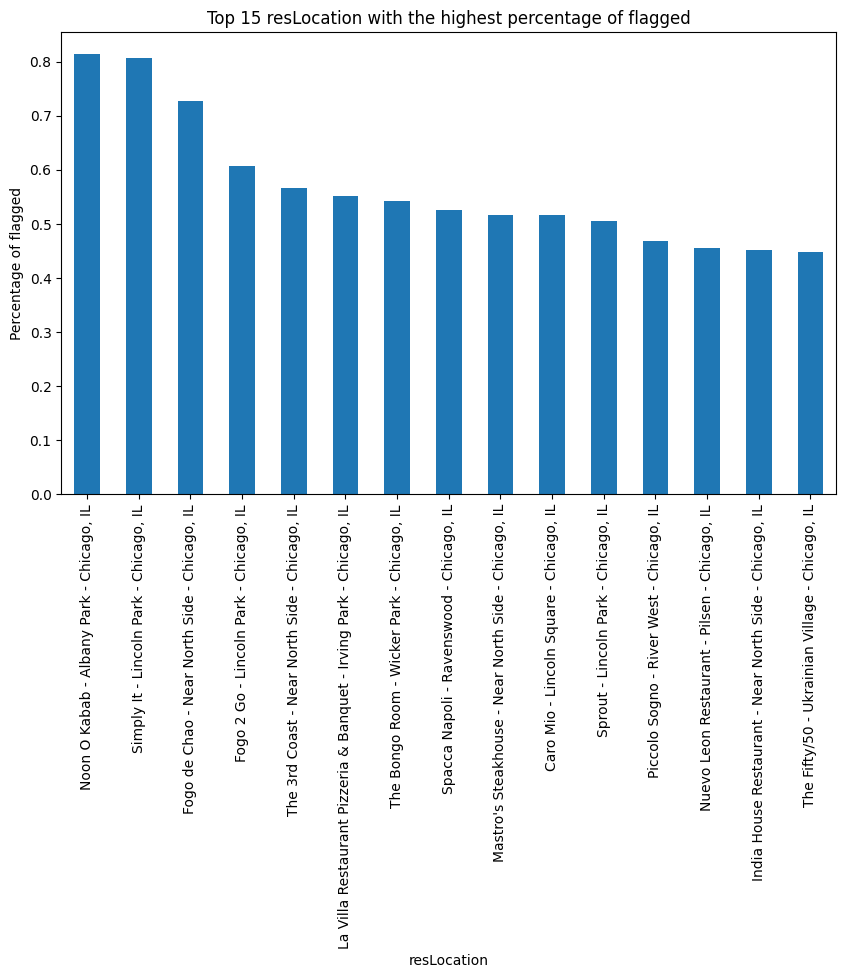

In [67]:
grouped = df.groupby('resLocation')['flagged'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
grouped.plot(kind='bar')
plt.ylabel('Percentage of flagged')
plt.title('Top 15 resLocation with the highest percentage of flagged')
plt.show()

In [68]:
# infer format of dates 
df['reviewerYelpJoinDate'] = pd.to_datetime(df['reviewerYelpJoinDate'], format='mixed')
df['reviewDate2'] = pd.to_datetime(df['reviewDate'], format='mixed')
# Calculate the difference
df['date_diff_joinedandreviewed'] = (df['reviewDate2'] - df['reviewerYelpJoinDate']).dt.days


In [69]:
df.head(5)


,reviewDate,reviewID,reviewerID,reviewContent,reviewRating,reviewUsefulCount,reviewCoolCount,reviewFunnyCount,restaurantID,flagged,...,PERSON_count,PHONE_NUMBER_count,DATE_TIME_flag,EMAIL_ADDRESS_flag,NRP_flag,LOCATION_flag,PERSON_flag,PHONE_NUMBER_flag,reviewDate2,date_diff_joinedandreviewed
0,9/22/2012,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,"Unlike Next, which we'd eaten at the previous ...",5,0,0,0,pbEiXam9YJL3neCYHGwLUA,0,...,4,0,1,0,1,0,1,0,2012-09-22,1087
1,9/22/2012,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,Probably one of the best meals I've had ever. ...,5,0,0,0,pbEiXam9YJL3neCYHGwLUA,0,...,1,0,1,0,0,0,1,0,2012-09-22,479
2,9/19/2012,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,Service was impeccable. Experience and present...,3,2,0,0,pbEiXam9YJL3neCYHGwLUA,0,...,0,0,0,0,0,0,0,0,2012-09-19,1479
3,9/6/2012,iSN,DlwexC7z88ymAzu45skODw,"The problem with places like this, given the e...",3,8,0,3,pbEiXam9YJL3neCYHGwLUA,0,...,2,0,1,0,0,0,1,0,2012-09-06,1802
4,9/9/2012,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,I have no idea how to write my review - dining...,5,1,2,0,pbEiXam9YJL3neCYHGwLUA,0,...,0,0,1,0,1,1,0,0,2012-09-09,1897


/var/folders/1t/nll74_0j61918pgb1cz1kwsr0000gn/T/ipykernel_8905/628546070.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df["flagged"]==1][column], fill=True, color="red", label="Fraud", ax=ax)
/var/folders/1t/nll74_0j61918pgb1cz1kwsr0000gn/T/ipykernel_8905/628546070.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df["flagged"]==1][column], fill=True, color="red", label="Fraud", ax=ax)
/var/folders/1t/nll74_0j61918pgb1cz1kwsr0000gn/T/ipykernel_8905/628546070.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df["flagged"]==1][column], fill=True, color="red", label="Fraud", ax=ax)
/var/folders/1t/nll74_0j61918pgb1cz1kwsr0000gn/T/ipykernel_8905/628546070.py:11: UserWarning: Dataset has 0 variance; skipping density esti

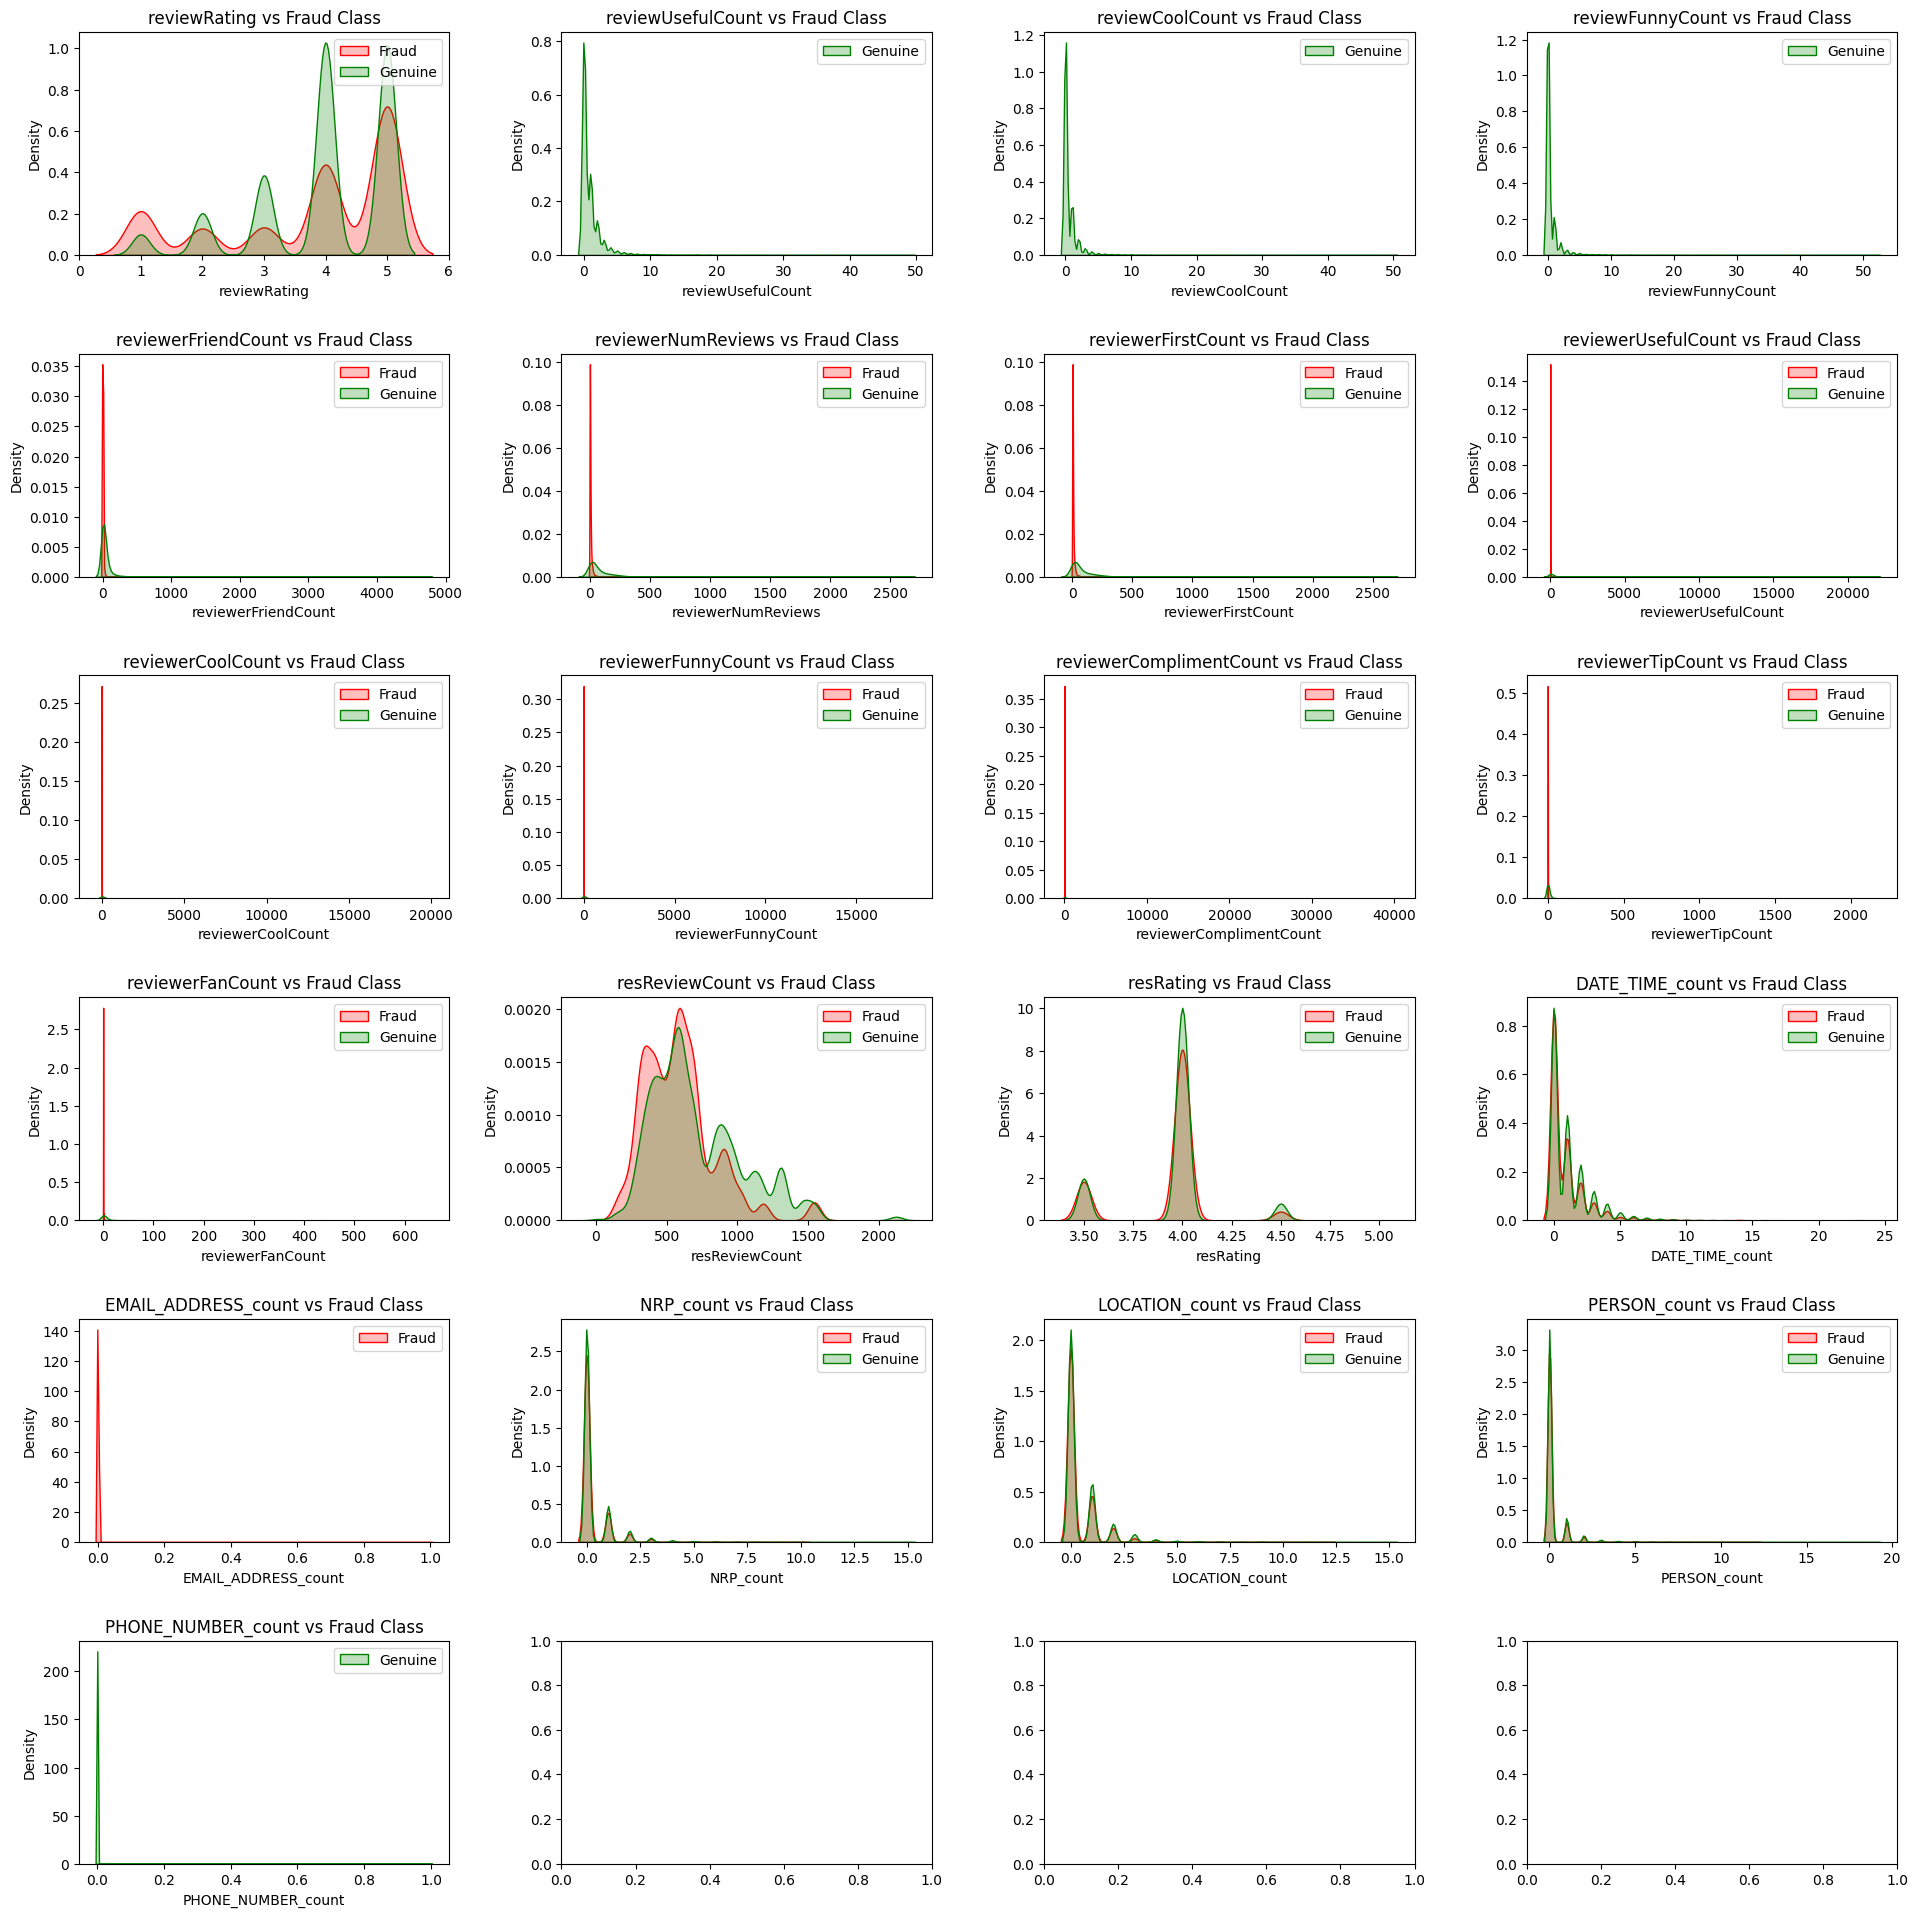

In [70]:
# summers part
# Define rows and columns for the subplots
n_rows = 6
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
fig.tight_layout(pad=5)

for ax, column in zip(axes.ravel(), numerical_columns):
    sns.kdeplot(df[df["flagged"]==1][column], fill=True, color="red", label="Fraud", ax=ax)
    sns.kdeplot(df[df["flagged"]==0][column], fill=True, color="green", label="Genuine", ax=ax)
    ax.set_title(column + " vs Fraud Class")
    ax.set_ylabel("Density")
    ax.legend()

plt.show()

### Density Plot Function 

In [71]:
def density_plot(real, flagged, xlabel, ylabel, title):
    fig, ax = plt.subplots()
    sns.kdeplot(real, fill=True, color="green", label="Genuine", ax=ax)
    
    sns.kdeplot(flagged, fill=True, color="red", label="Fraudulent", ax=ax)
    plt.xlim(left = 0)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    fig.suptitle(title)

/var/folders/1t/nll74_0j61918pgb1cz1kwsr0000gn/T/ipykernel_8905/3261830140.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["flagged"]==1]["date_diff_joinedandreviewed"], shade=True, color="red", label="Fake", ax=ax)
/var/folders/1t/nll74_0j61918pgb1cz1kwsr0000gn/T/ipykernel_8905/3261830140.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["flagged"]==0]["date_diff_joinedandreviewed"], shade=True, color="green", label="Real", ax=ax)


Text(0.5, 0.98, 'Time Difference vs Fraud Class')

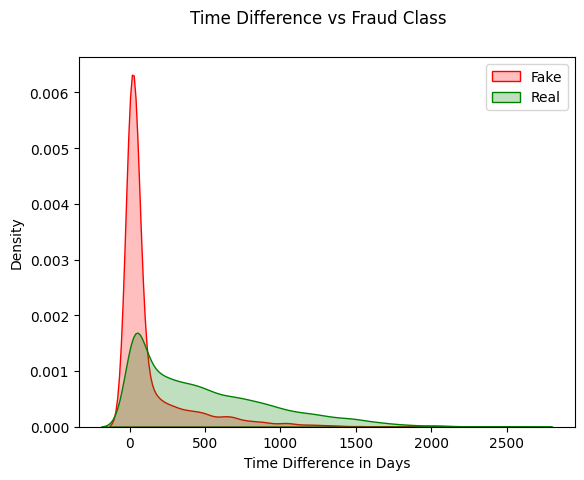

In [72]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["flagged"]==1]["date_diff_joinedandreviewed"], shade=True, color="red", label="Fake", ax=ax)
sns.kdeplot(df[df["flagged"]==0]["date_diff_joinedandreviewed"], shade=True, color="green", label="Real", ax=ax)

ax.set_xlabel("Time Difference in Days")
ax.set_ylabel("Density")
plt.legend() 

fig.suptitle("Time Difference vs Fraud Class")



Text(0.5, 0.98, 'Num of Reviews vs Fraud Class')

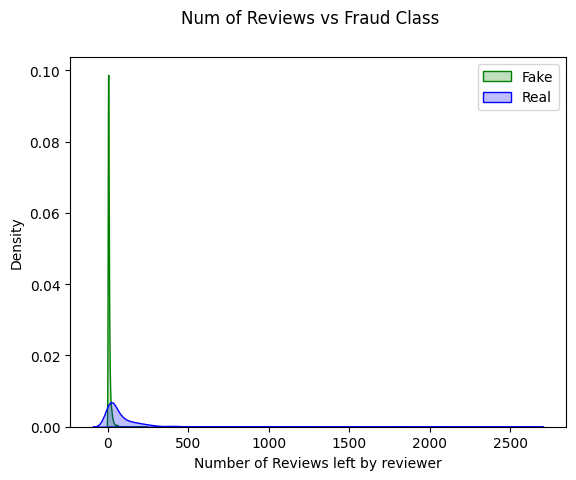

In [73]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["flagged"]==1]["reviewerNumReviews"], fill=True, color="green", label="Fake", ax=ax)
sns.kdeplot(df[df["flagged"]==0]["reviewerNumReviews"], fill=True, color="blue", label="Real", ax=ax)

ax.set_xlabel("Number of Reviews left by reviewer")
ax.set_ylabel("Density")
plt.legend() 

fig.suptitle("Num of Reviews vs Fraud Class")

/var/folders/1t/nll74_0j61918pgb1cz1kwsr0000gn/T/ipykernel_8905/876658666.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["flagged"]==1]["resReviewCount"], shade=True, color="green", label="Fake", ax=ax)
/var/folders/1t/nll74_0j61918pgb1cz1kwsr0000gn/T/ipykernel_8905/876658666.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["flagged"]==0]["resReviewCount"], shade=True, color="blue", label="Real", ax=ax)


Text(0.5, 0.98, 'Num of Reviews for restaurant vs Fraud Class')

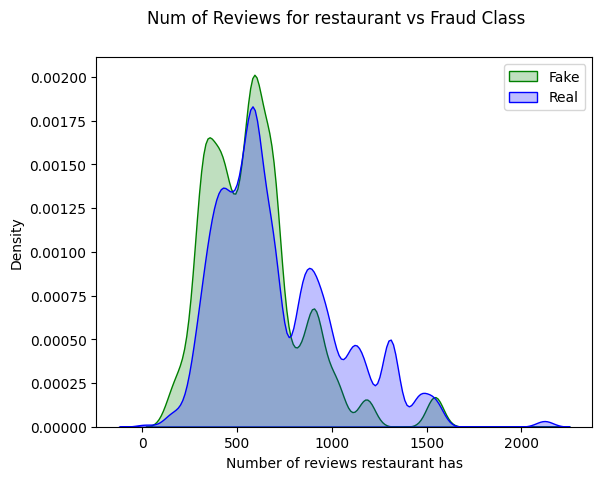

In [74]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["flagged"]==1]["resReviewCount"], shade=True, color="green", label="Fake", ax=ax)
sns.kdeplot(df[df["flagged"]==0]["resReviewCount"], shade=True, color="blue", label="Real", ax=ax)

ax.set_xlabel("Number of reviews restaurant has")
ax.set_ylabel("Density")
plt.legend() 

fig.suptitle("Num of Reviews for restaurant vs Fraud Class")

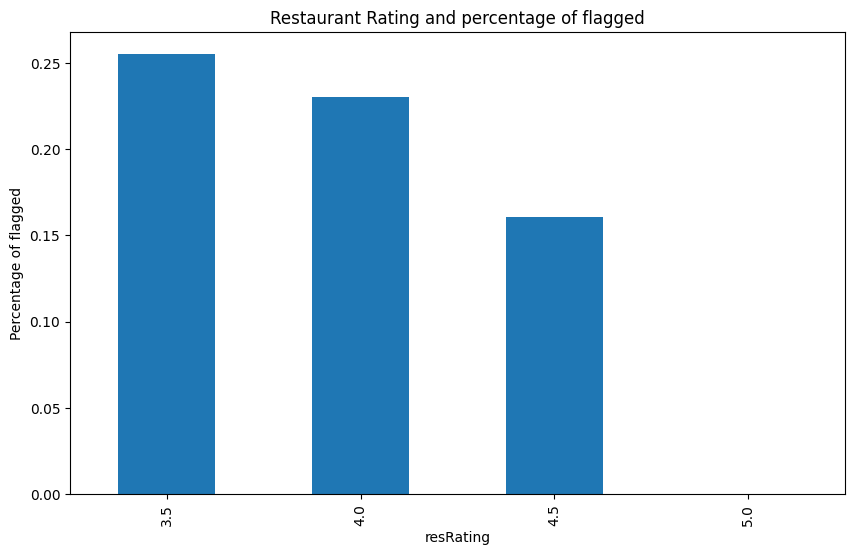

In [75]:
grouped = df.groupby('resRating')['flagged'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
grouped.plot(kind='bar')
plt.ylabel('Percentage of flagged')
plt.title('Restaurant Rating and percentage of flagged')
plt.show()

# Nic part

In [76]:
# select numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_df_col = ['reviewerID', 'reviewDate', 'flagged', 'restaurantID', 'reviewRating', 'reviewUsefulCount', 'reviewCoolCount',
       'reviewFunnyCount', 'reviewerFriendCount', 'reviewerNumReviews',
       'reviewerFirstCount', 'reviewerUsefulCount', 'reviewerCoolCount',
       'reviewerFunnyCount', 'reviewerComplimentCount', 'reviewerTipCount',
       'reviewerFanCount', 'resReviewCount', 'resRating', 'DATE_TIME_count',
       'EMAIL_ADDRESS_count', 'NRP_count', 'LOCATION_count', 'PERSON_count',
       'PHONE_NUMBER_count']

# num_df = df[['reviewerID', 'reviewDate', 'reviewRating', 'reviewUsefulCount', 'reviewCoolCount', 'reviewFunnyCount', 'flagged', 'restaurantID']]
num_df = df[num_df_col]
num_df

,reviewerID,reviewDate,flagged,restaurantID,reviewRating,reviewUsefulCount,reviewCoolCount,reviewFunnyCount,reviewerFriendCount,reviewerNumReviews,...,reviewerTipCount,reviewerFanCount,resReviewCount,resRating,DATE_TIME_count,EMAIL_ADDRESS_count,NRP_count,LOCATION_count,PERSON_count,PHONE_NUMBER_count
0,bNYesZ944s6IJVowOnB0iA,9/22/2012,0,pbEiXam9YJL3neCYHGwLUA,5,0,0,0,11,48,...,0,1,841,4.5,3,0,1,0,4,0
1,TRKxLC3y-ZvP45e5iilMtw,9/22/2012,0,pbEiXam9YJL3neCYHGwLUA,5,0,0,0,0,4,...,0,0,841,4.5,2,0,0,0,1,0
2,0EMm8umAqXZzyhxNpL4M9g,9/19/2012,0,pbEiXam9YJL3neCYHGwLUA,3,2,0,0,2,11,...,0,0,841,4.5,0,0,0,0,0,0
3,DlwexC7z88ymAzu45skODw,9/6/2012,0,pbEiXam9YJL3neCYHGwLUA,3,8,0,3,84,60,...,11,0,841,4.5,1,0,0,0,2,0
4,kW2dk1CWihmh3g7k9N2G8A,9/9/2012,0,pbEiXam9YJL3neCYHGwLUA,5,1,2,0,333,1209,...,22,70,841,4.5,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26951,tivh8lr6pzBDNfrJLYWh_g,3/17/2010,0,v9qEDxi3t-P0CmGWAkkGvw,4,0,0,1,31,165,...,0,3,14,4.0,0,0,0,0,0,0
26952,jKs4FQgkV0wSX8BG2_dgTg,4/14/2011,0,RRflazDtBkqqpvEz2hbV2w,5,0,0,0,6,11,...,0,1,15,4.0,2,0,0,0,0,0
26953,vX6aOMQ3HWCbwZVfCkCauw,9/23/2007,0,zI0E_yruu58ea-xq9aHi-w,3,0,1,0,13,49,...,1,1,16,4.0,0,0,0,0,0,0
26954,vX6aOMQ3HWCbwZVfCkCauw,11/18/2011,0,6XVXM78gBuU3gpq2hTOgJA,3,0,0,0,13,49,...,1,1,17,4.0,0,0,0,0,0,0


In [77]:
#general count of variables

rating_count = num_df['reviewRating'].value_counts().sort_index()
useful_count = num_df['reviewUsefulCount'].value_counts().sort_index()[:10]
cool_count = num_df['reviewCoolCount'].value_counts().sort_index()[:10]
funny_count = num_df['reviewFunnyCount'].value_counts().sort_index()[:10]
flagged_count = num_df['flagged'].value_counts().sort_index()

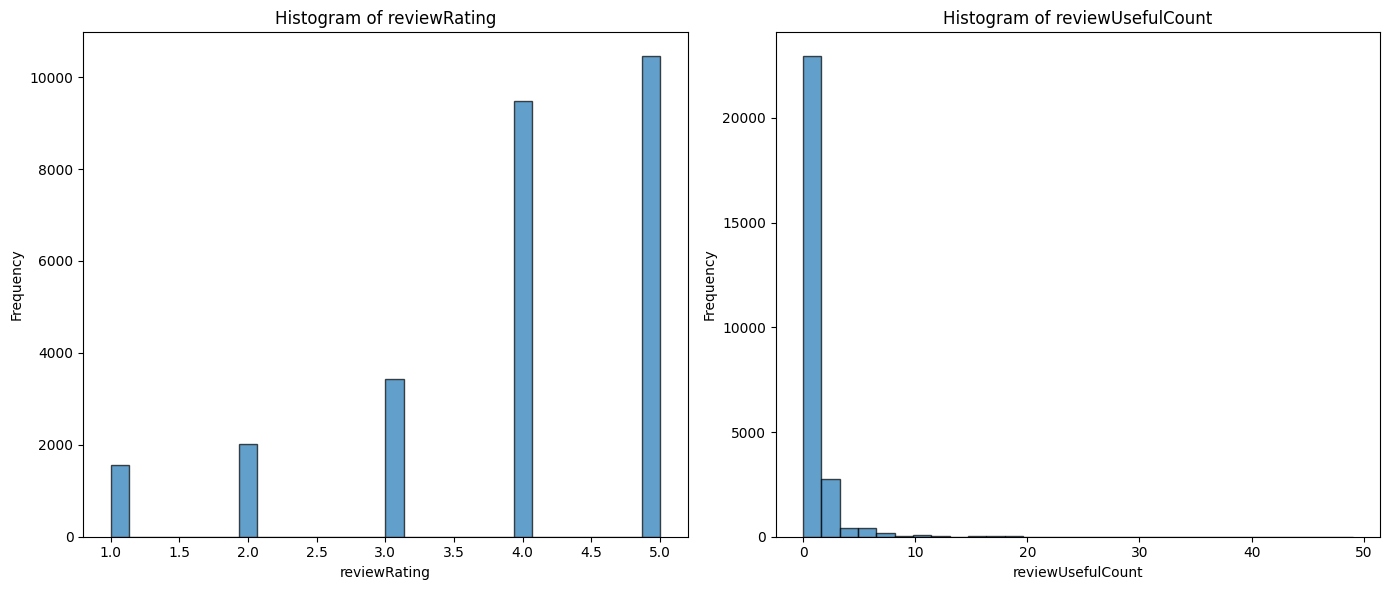

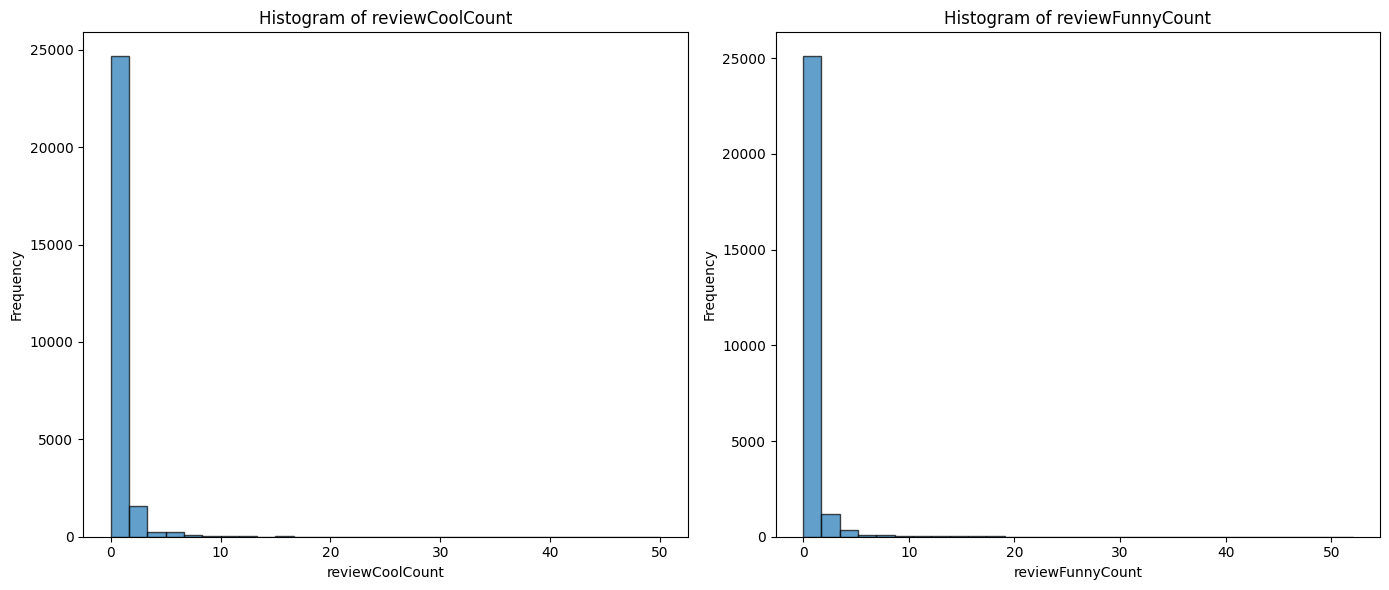

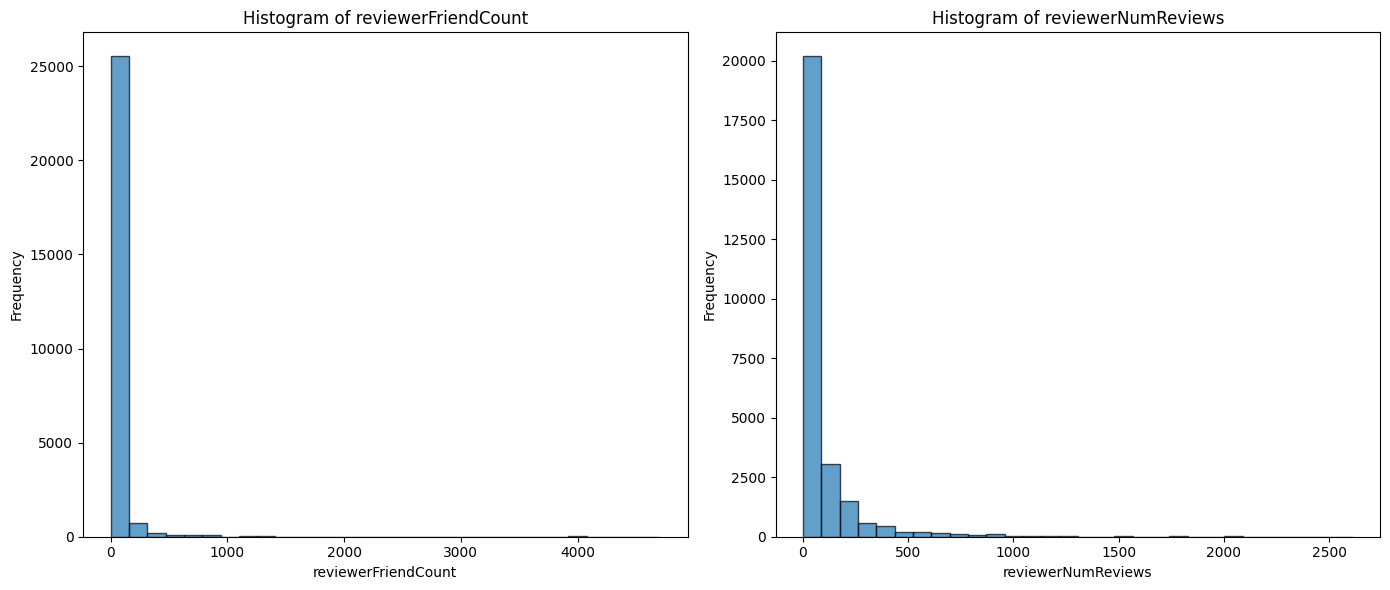

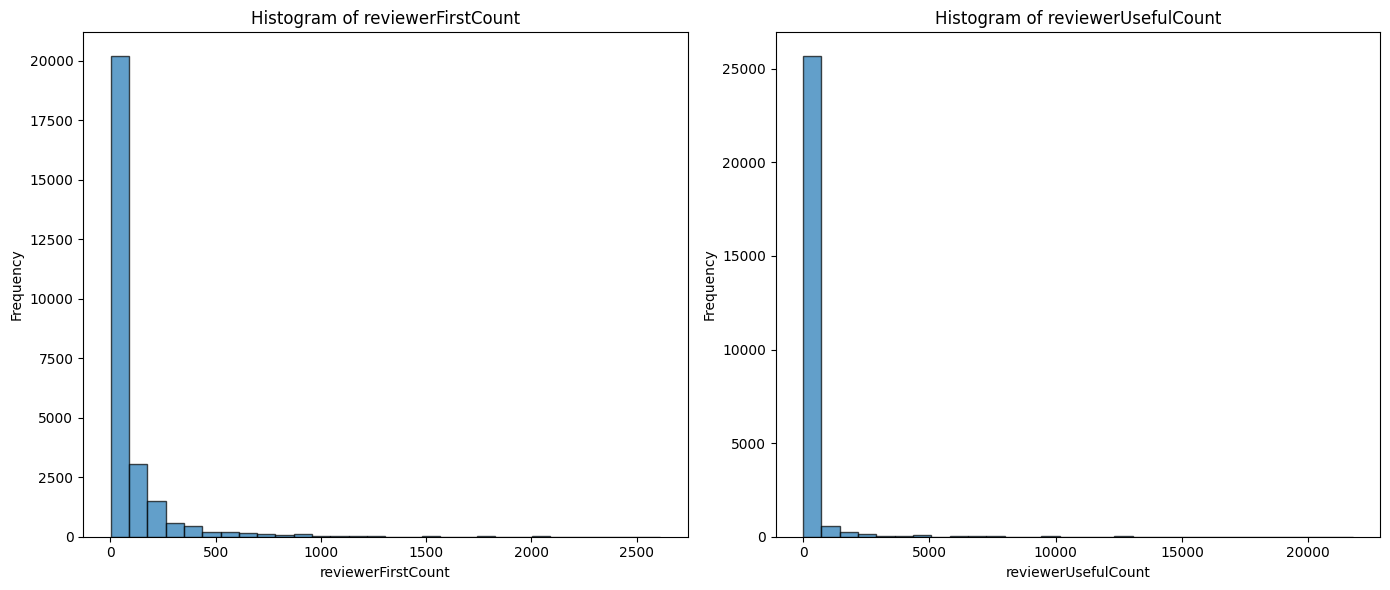

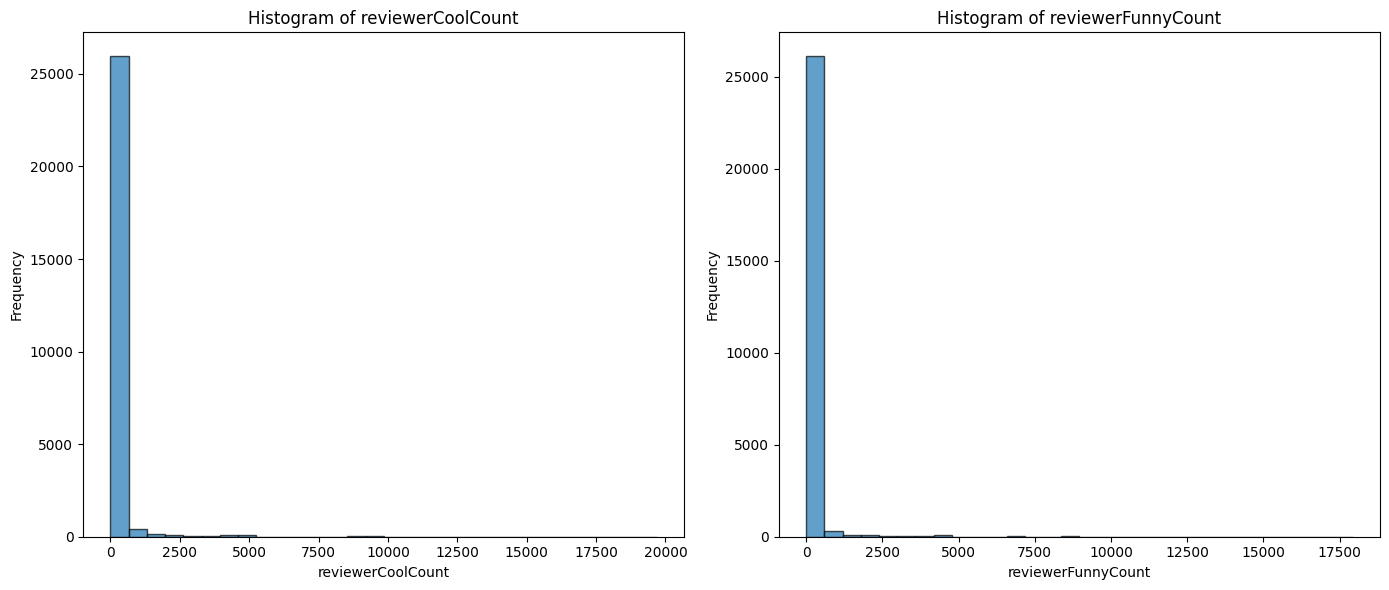

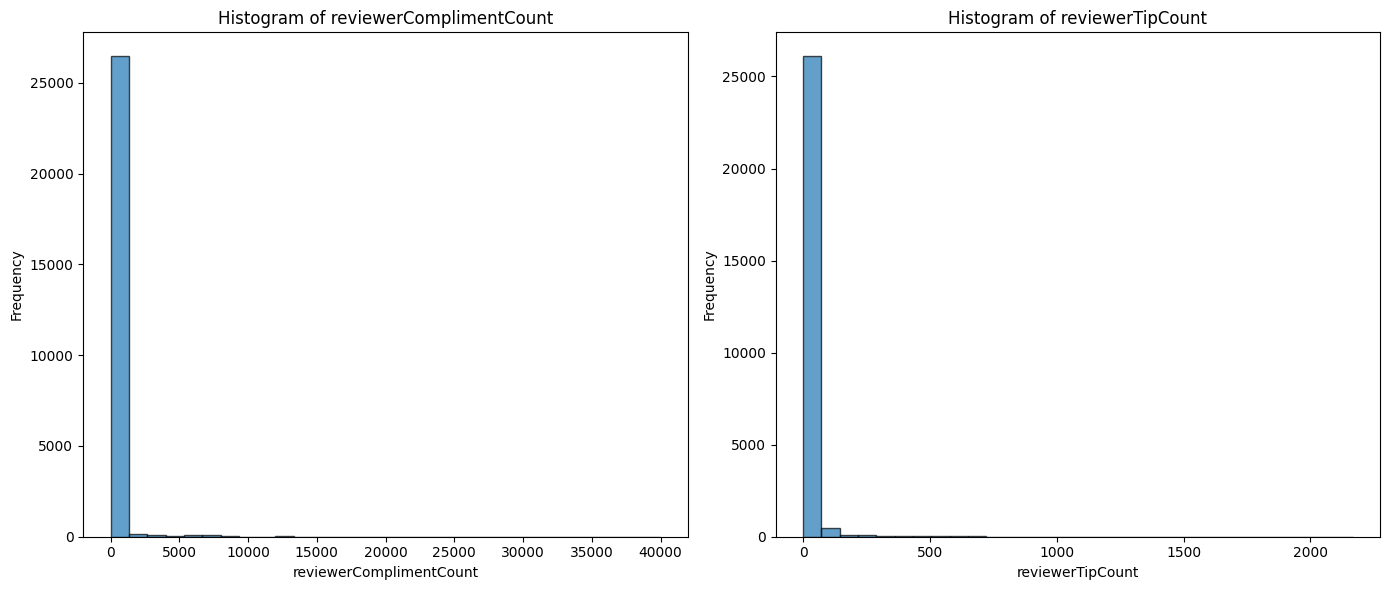

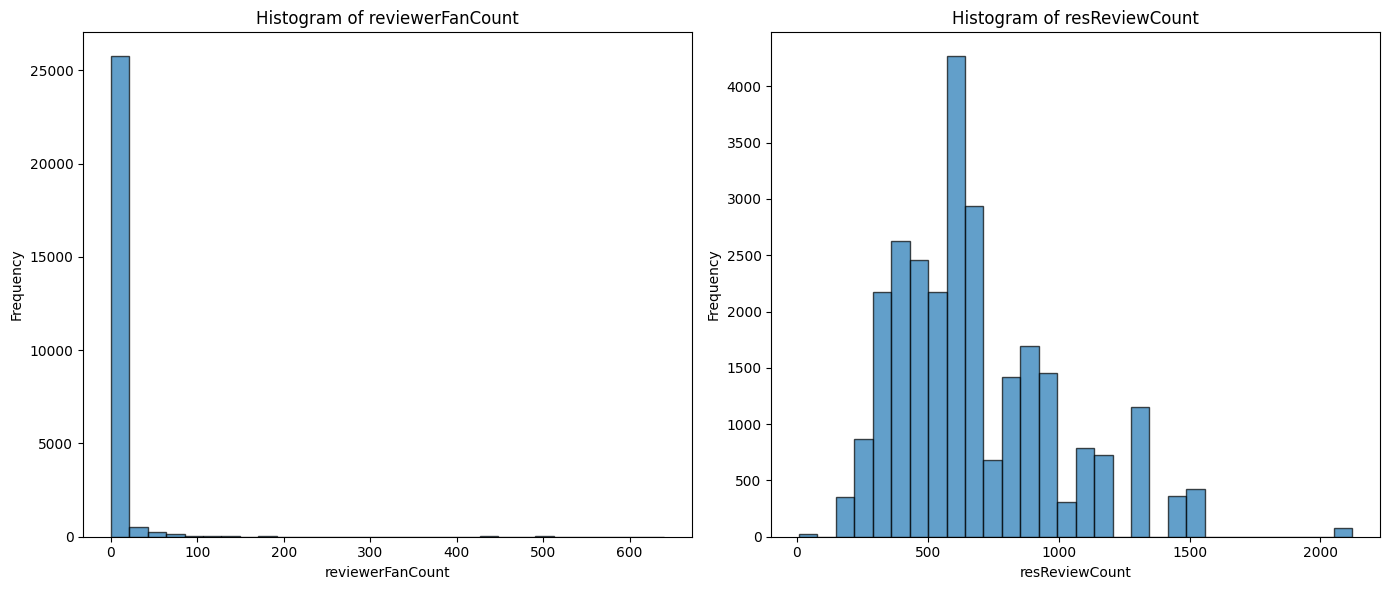

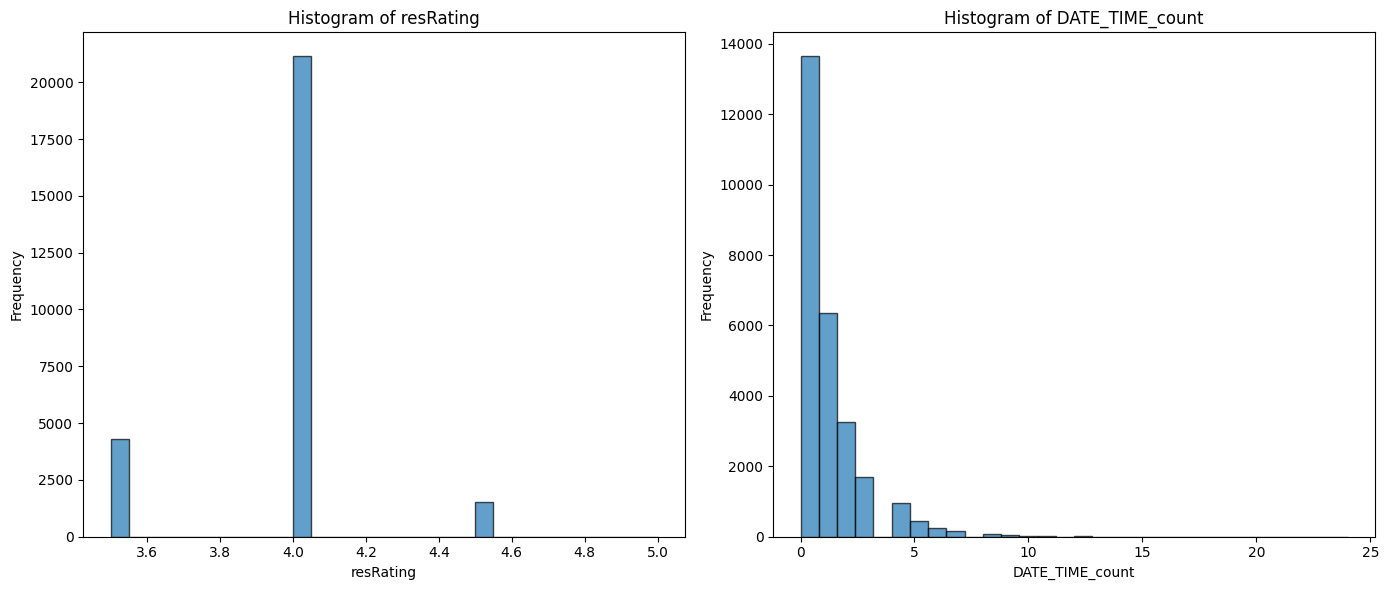

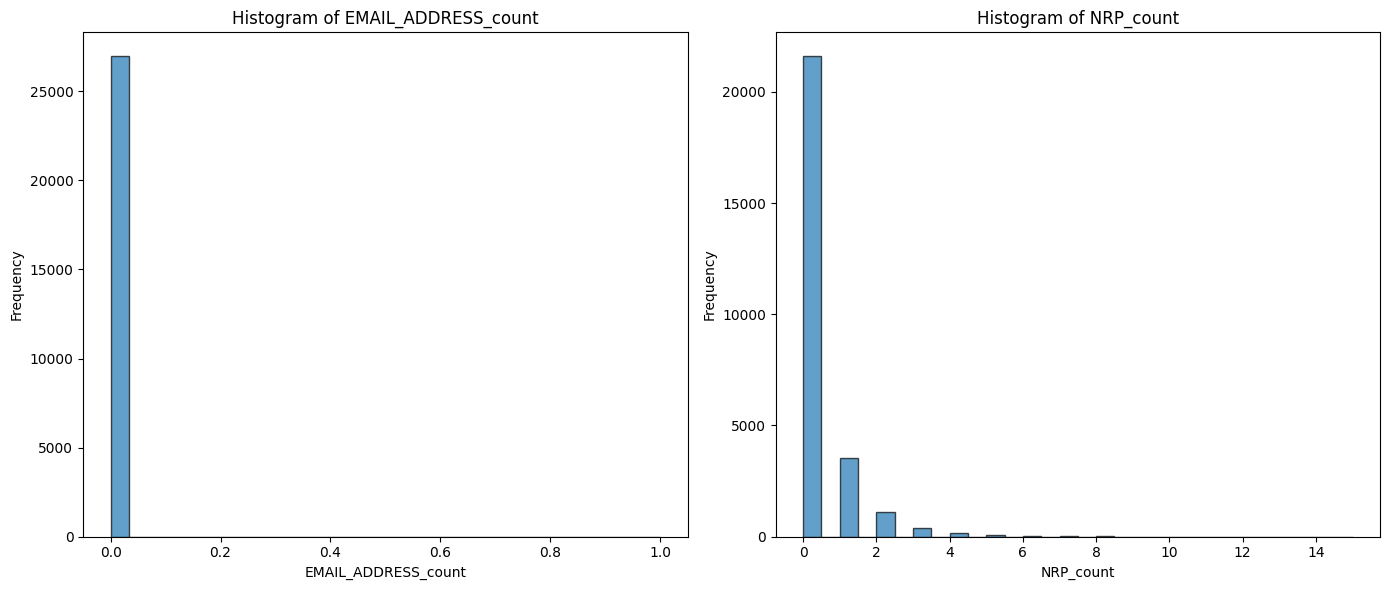

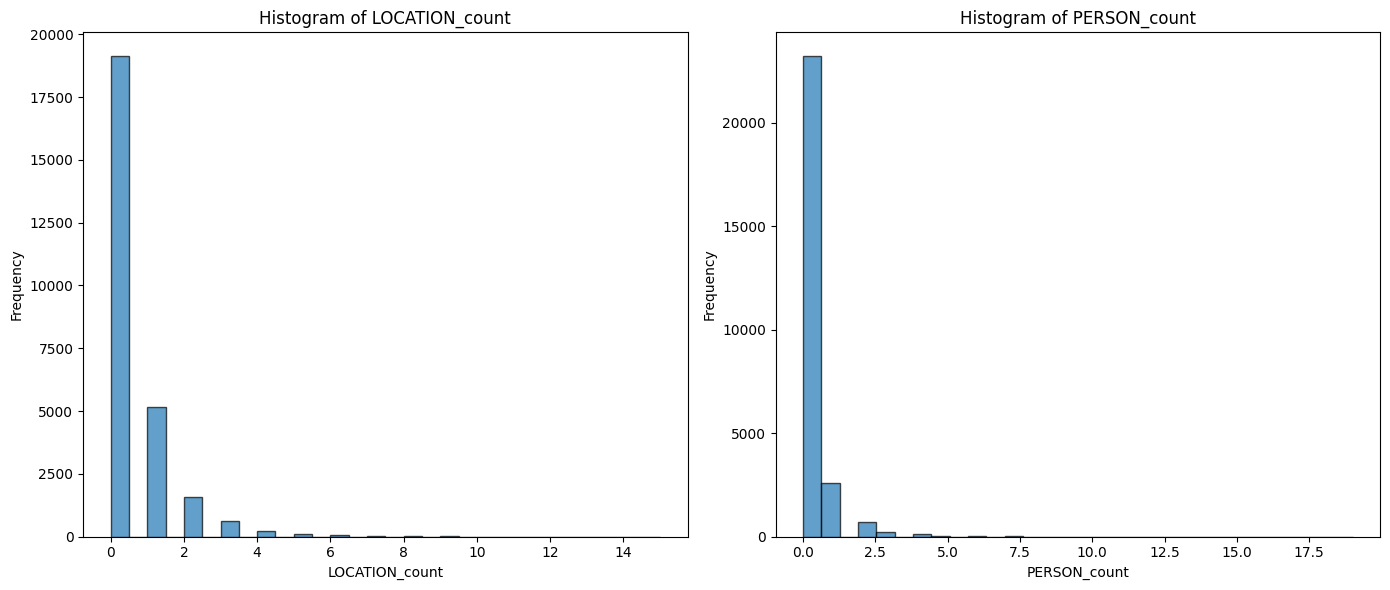

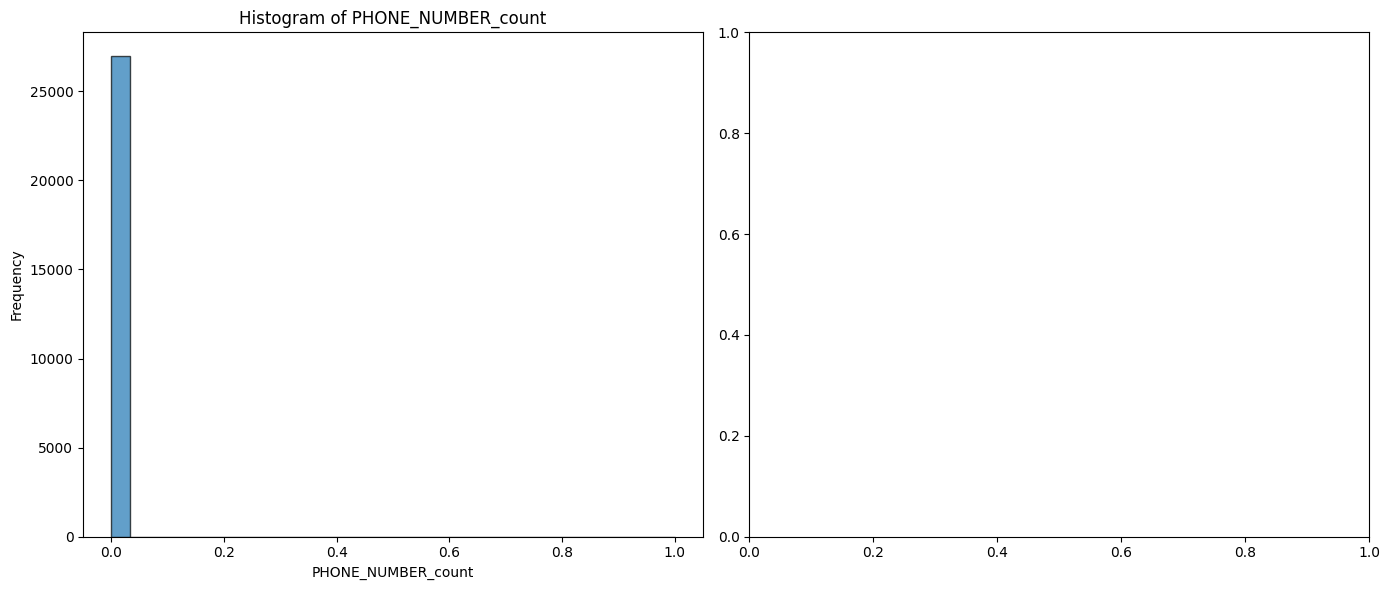

In [78]:
# summers part
# Plotting histograms in pairs
for i in range(0, len(numerical_columns), 2):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot first histogram (if exists)
    if i < len(numerical_columns):
        df[numerical_columns[i]].hist(bins=30, edgecolor='black', alpha=0.7, ax=ax[0])
        ax[0].set_title(f'Histogram of {numerical_columns[i]}')
        ax[0].set_xlabel(numerical_columns[i])
        ax[0].set_ylabel('Frequency')
        ax[0].grid(False)
    
    # Plot second histogram (if exists)
    if i+1 < len(numerical_columns):
        df[numerical_columns[i+1]].hist(bins=30, edgecolor='black', alpha=0.7, ax=ax[1])
        ax[1].set_title(f'Histogram of {numerical_columns[i+1]}')
        ax[1].set_xlabel(numerical_columns[i+1])
        ax[1].set_ylabel('Frequency')
        ax[1].grid(False)
    
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Funny')

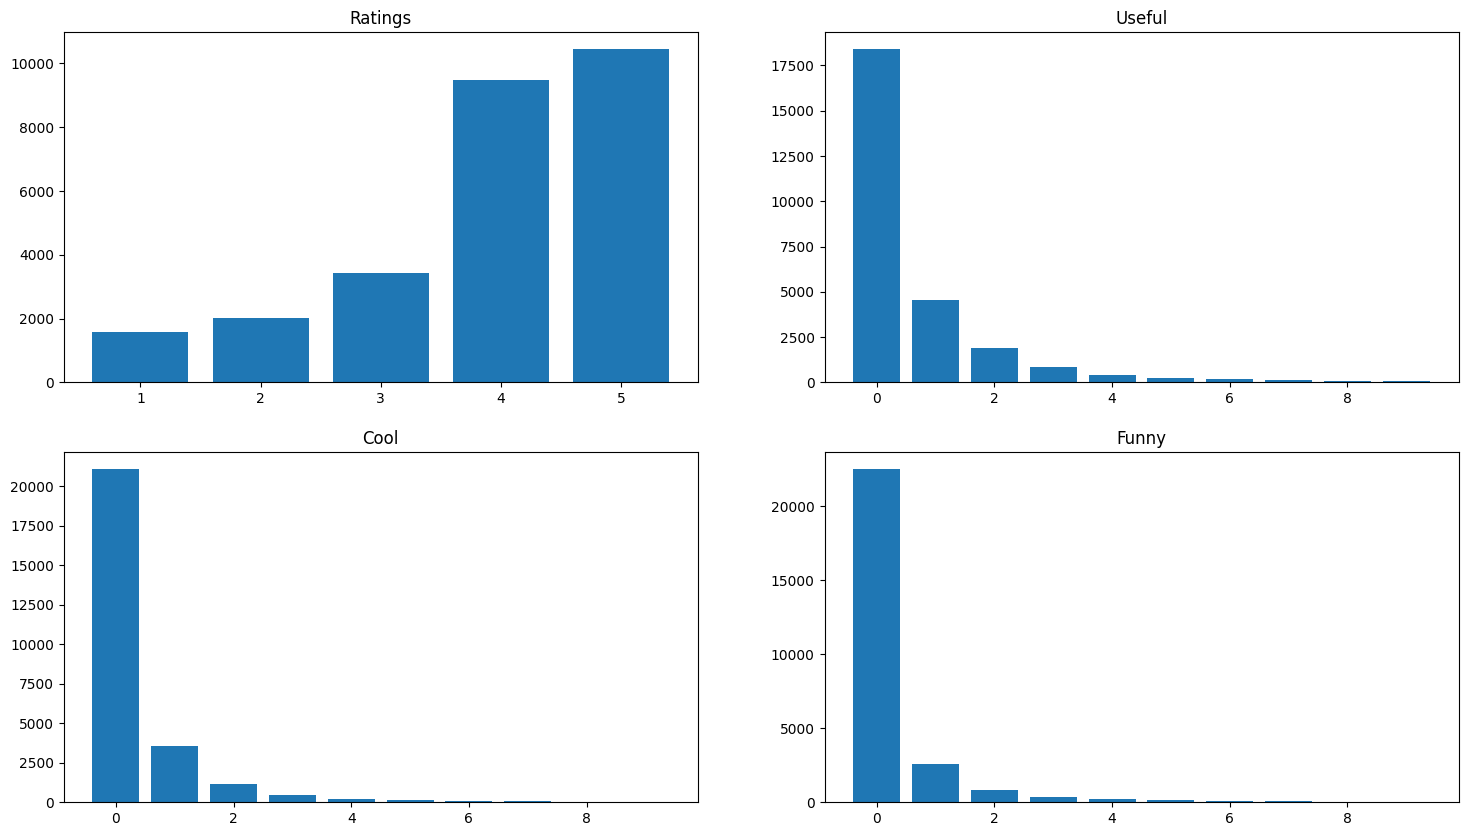

In [79]:
# individual histograms of variables
fig, axs = plt.subplots(2, 2, figsize=(18,10))

axs[0,0].bar(rating_count.index, rating_count)
axs[0,0].set_title('Ratings')

axs[0,1].bar(useful_count.index, useful_count)
axs[0,1].set_title('Useful')

axs[1,0].bar(cool_count.index, cool_count)
axs[1,0].set_title('Cool')

axs[1,1].bar(funny_count.index, funny_count)
axs[1,1].set_title('Funny')

In [80]:
df.head()

,reviewDate,reviewID,reviewerID,reviewContent,reviewRating,reviewUsefulCount,reviewCoolCount,reviewFunnyCount,restaurantID,flagged,...,PERSON_count,PHONE_NUMBER_count,DATE_TIME_flag,EMAIL_ADDRESS_flag,NRP_flag,LOCATION_flag,PERSON_flag,PHONE_NUMBER_flag,reviewDate2,date_diff_joinedandreviewed
0,9/22/2012,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,"Unlike Next, which we'd eaten at the previous ...",5,0,0,0,pbEiXam9YJL3neCYHGwLUA,0,...,4,0,1,0,1,0,1,0,2012-09-22,1087
1,9/22/2012,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,Probably one of the best meals I've had ever. ...,5,0,0,0,pbEiXam9YJL3neCYHGwLUA,0,...,1,0,1,0,0,0,1,0,2012-09-22,479
2,9/19/2012,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,Service was impeccable. Experience and present...,3,2,0,0,pbEiXam9YJL3neCYHGwLUA,0,...,0,0,0,0,0,0,0,0,2012-09-19,1479
3,9/6/2012,iSN,DlwexC7z88ymAzu45skODw,"The problem with places like this, given the e...",3,8,0,3,pbEiXam9YJL3neCYHGwLUA,0,...,2,0,1,0,0,0,1,0,2012-09-06,1802
4,9/9/2012,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,I have no idea how to write my review - dining...,5,1,2,0,pbEiXam9YJL3neCYHGwLUA,0,...,0,0,1,0,1,1,0,0,2012-09-09,1897


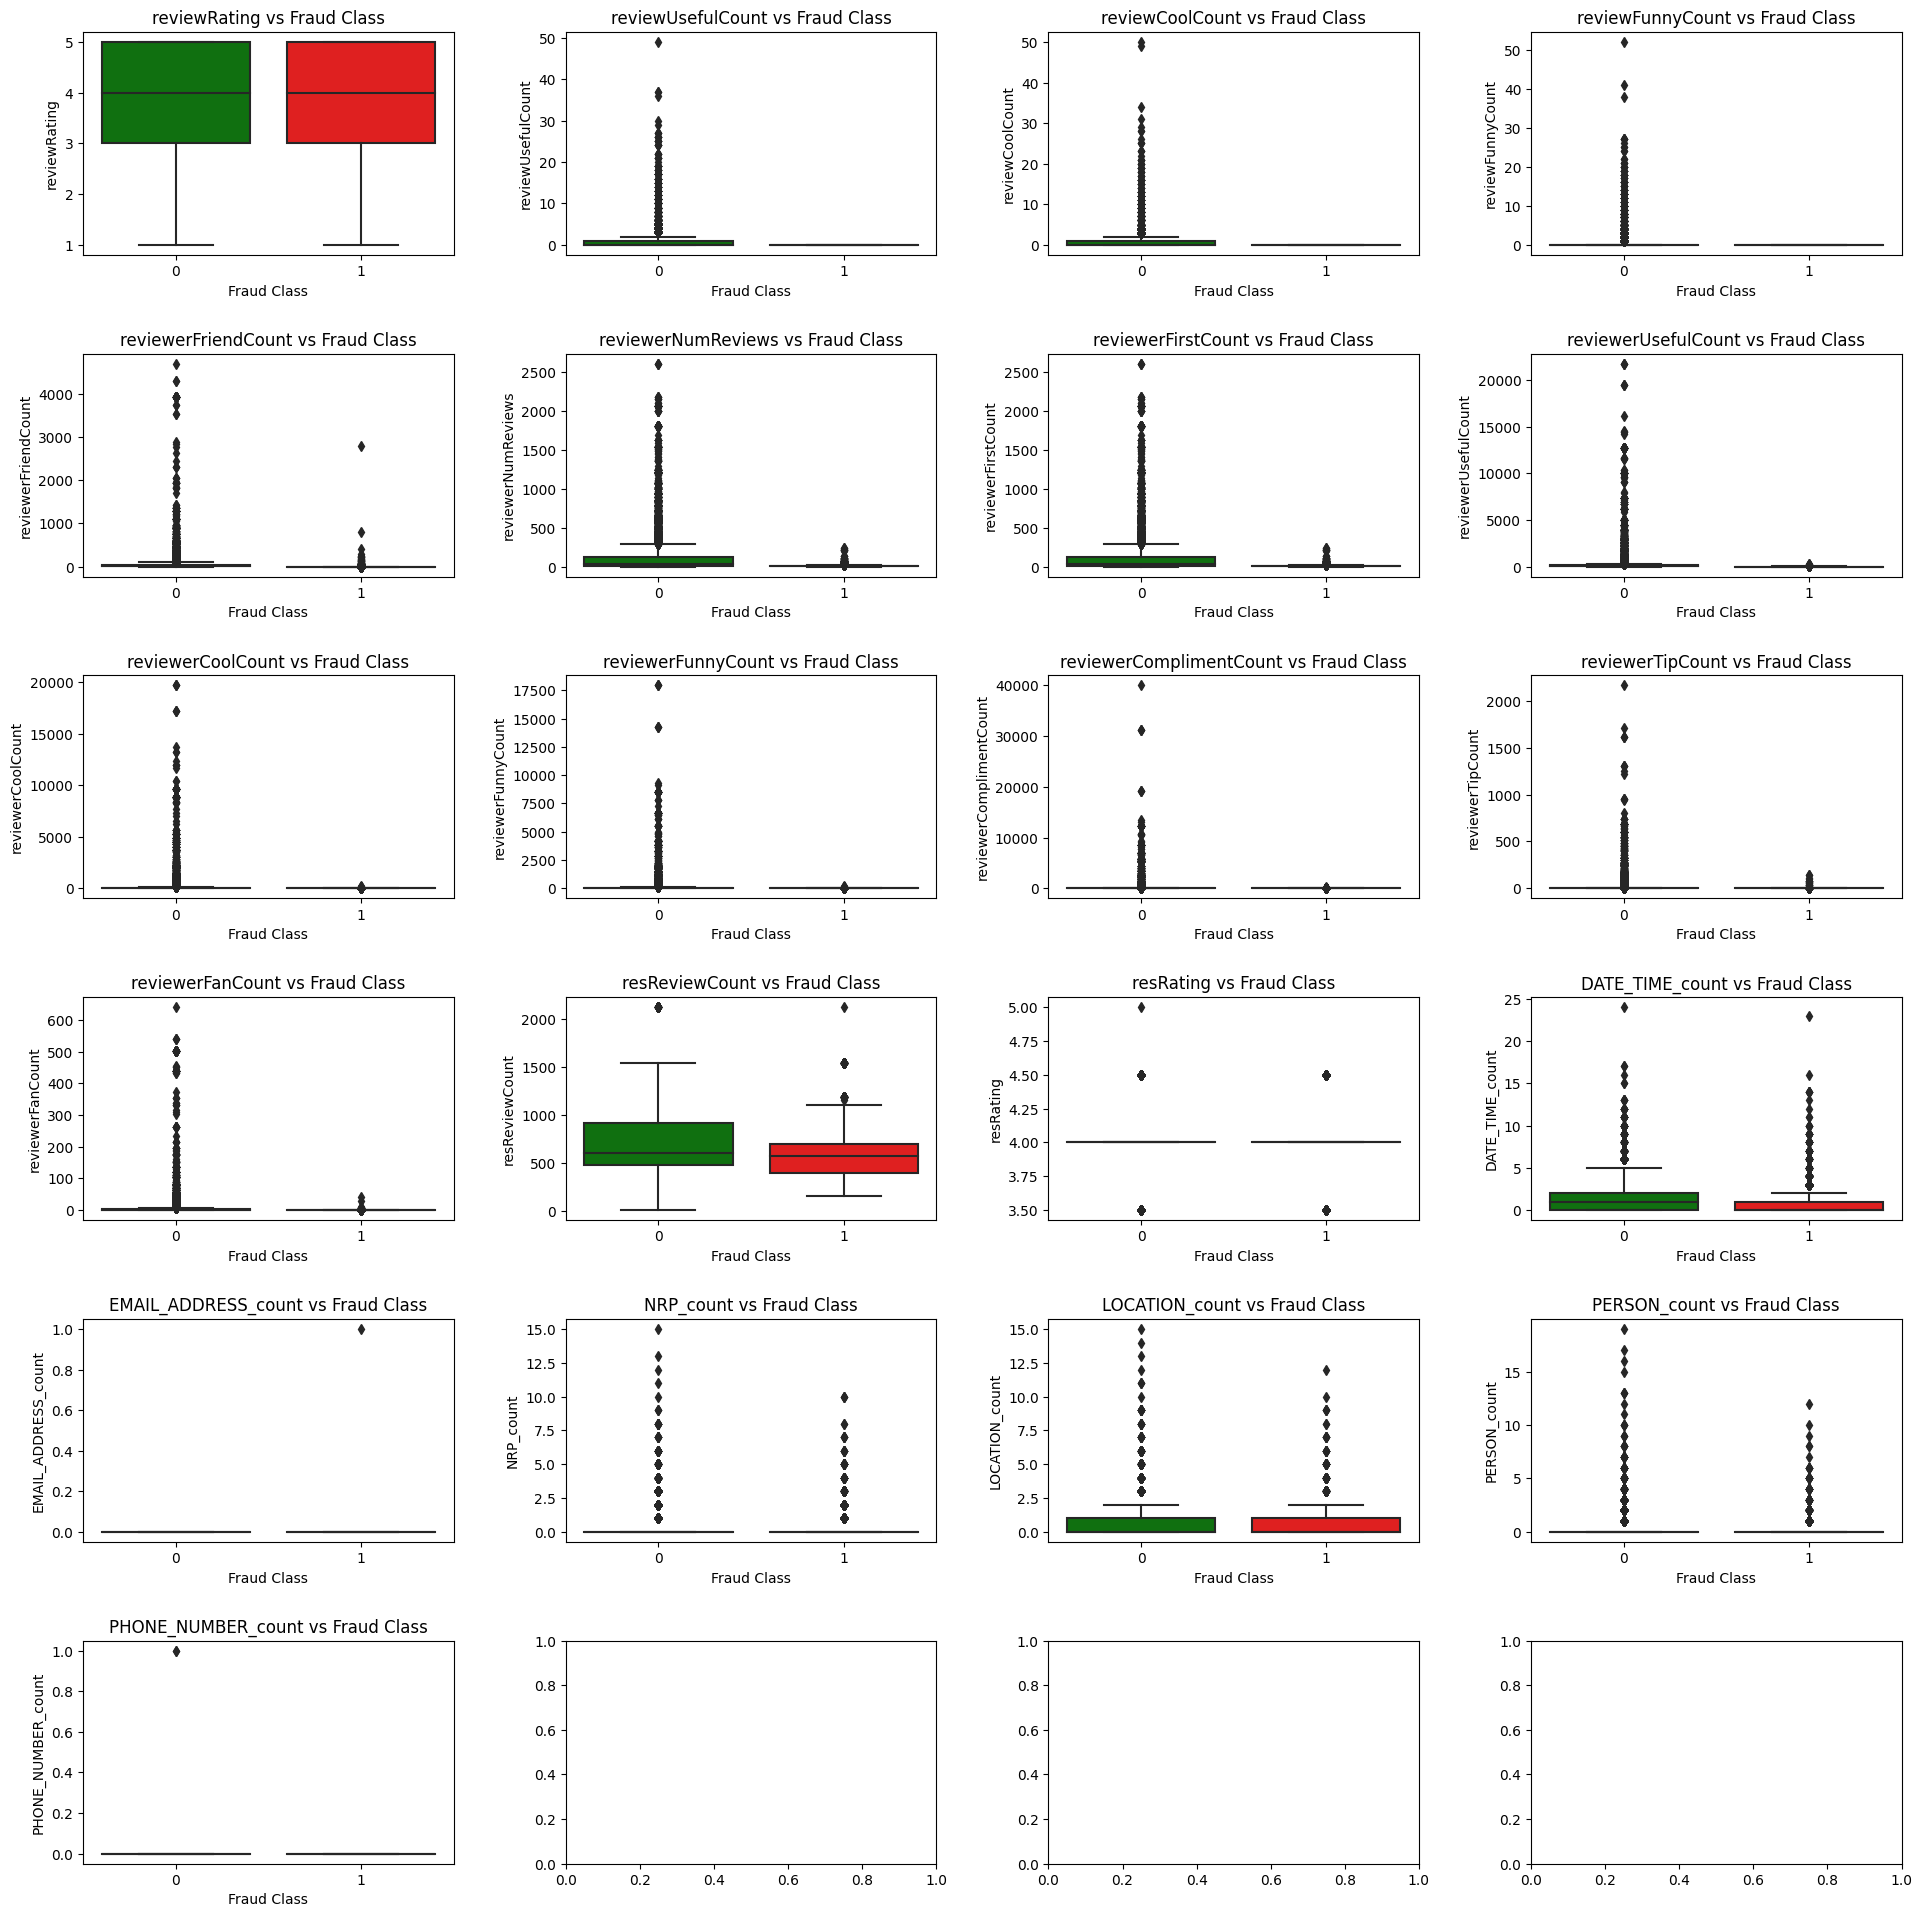

In [81]:
n_rows = 6
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
fig.tight_layout(pad=5)

for ax, column in zip(axes.ravel(), numerical_columns):
    sns.boxplot(x="flagged", y=column, data=df, palette={1: "red", 0: "green"}, ax=ax)
    ax.set_title(column + " vs Fraud Class")
    ax.set_ylabel(column)
    ax.set_xlabel("Fraud Class")

plt.show()

filtered_cat is missing here

In [82]:
# import math 
# n_cols = 3

# # Calculate the number of rows needed
# n_rows = math.ceil(len(cat_columns[-6:]) / n_cols)

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))  # Adjusted figsize

# # Flat axes for easier iteration
# axes_flat = axes.ravel()

# for idx, col in enumerate(cat_columns[-6:]):
#     # Group by the categorical column and compute mean of 'flagged'
#     col_fraud = df.groupby(col)['flagged'].mean()
    
#     # Plot
#     if col_fraud.nunique() > 2:  # Use pointplot if more than 2 unique values
#         sns.pointplot(x=col_fraud.index, y=col_fraud.values, ax=axes_flat[idx])
#     else:  # Use barplot otherwise
#         sns.barplot(x=col_fraud.index, y=col_fraud.values, ax=axes_flat[idx])
    
#     # Set title and labels
#     axes_flat[idx].set_title(f'{col} vs Fraud Rate', fontsize=10)
#     axes_flat[idx].set_ylabel('Fraud Rate', fontsize=8)
#     axes_flat[idx].set_xlabel(col, fontsize=8)
#     axes_flat[idx].tick_params(axis='both', which='major', labelsize=7)

# # If there are any remaining unused subplots, hide them
# for idx in range(len(filtered_cat), n_cols * n_rows):
#     axes_flat[idx].axis('off')

# plt.tight_layout()
# plt.show()

In [83]:
# # individual histograms of variables
# fig, axs = plt.subplots(3, 2, figsize=(18,10))

# axs[0,0].bar(datetime_count.index, rating_count)
# axs[0,0].set_title('Ratings')

# axs[0,1].bar(email_count.index, useful_count)
# axs[0,1].set_title('Useful')

# axs[1,0].bar(nrp_count.index, cool_count)
# axs[1,0].set_title('Cool')

# axs[1,1].bar(location_count.index, funny_count)
# axs[1,1].set_title('Funny')

# axs[2,1].bar(person_count.index, funny_count)
# axs[1,1].set_title('Funny')

# axs[2,1].bar(phone_count.index, funny_count)
# axs[1,1].set_title('Funny')

```Clean date data and OHE```

In [84]:
#feature engineer date

#sort by date
num_df.sort_values('reviewDate')
#drop weird dates
num_df_clean = num_df[(num_df['reviewDate'].str.len() <= 10) | (num_df['reviewDate'].str.len() >= 8)]
num_df_clean = num_df_clean[~num_df_clean['reviewDate'].str.contains('Update')]
num_df_clean = num_df_clean[~num_df_clean['reviewDate'].str.contains('\n')]

#sort by dates
num_df_sorted = num_df_clean.sort_values('reviewDate')
num_df_sorted

,reviewerID,reviewDate,flagged,restaurantID,reviewRating,reviewUsefulCount,reviewCoolCount,reviewFunnyCount,reviewerFriendCount,reviewerNumReviews,...,reviewerTipCount,reviewerFanCount,resReviewCount,resRating,DATE_TIME_count,EMAIL_ADDRESS_count,NRP_count,LOCATION_count,PERSON_count,PHONE_NUMBER_count
23987,xzNMMZNG-vImvP73tUsQKw,1/1/2006,0,RYw_no9ohtCg09aKorVffg,3,1,0,0,6,29,...,0,0,459,3.5,1,0,0,1,0,0
332,cWLSaEabp-BJq6XmovsZIQ,1/1/2007,0,pbEiXam9YJL3neCYHGwLUA,5,3,1,0,13,72,...,0,3,841,4.5,5,0,0,1,0,0
25399,kcaCt7o3RfgMYZmtf7qlEQ,1/1/2008,1,43rd1LKcZRIunySzbMsyLQ,5,0,0,0,0,2,...,0,0,693,4.5,0,0,0,0,0,0
10218,kmcdzKMT_XXYMjaTK-D63w,1/1/2009,0,ms5ge1XY9-Alu7HkybAMdQ,5,0,0,0,9,29,...,0,1,520,3.5,0,0,0,1,0,0
7787,K8rs_mDMl03GPOUuJzXPxA,1/1/2009,0,CwPi6NVuJIZZx4IBcTekFQ,4,4,1,1,3,14,...,0,0,727,3.5,4,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,d8cP4i7Ws0k2VC-AmrDWzQ,9/9/2012,0,hylBw5ND7XyPldM6BN28vw,4,0,0,0,22,55,...,27,2,616,4.0,0,0,1,0,0,0
10516,UKnzWXa4nKQ6jM3SfMZikQ,9/9/2012,0,4wreIFjaPMppyEnzKHbozg,5,0,0,0,2,4,...,1,0,828,3.5,0,0,0,0,0,0
8169,-HQGG_AMQcRZs9XJ2gd5Lg,9/9/2012,0,tCkwBTuEFvhuaBoEUWqbuQ,2,0,0,0,22,195,...,89,2,541,4.0,1,0,1,0,0,0
11013,EhXudXfe67jVQc0Dgs7YdQ,9/9/2012,0,-pO0hsi0xlF4FwqLGJUizg,2,0,0,0,0,33,...,0,0,417,4.0,0,0,0,0,0,0


In [85]:
#OHE on dates

num_df_sorted['reviewDate'] = pd.to_datetime(num_df_sorted['reviewDate'])
num_df_sorted['year'] = num_df_sorted['reviewDate'].dt.year
num_df_sorted['month'] = num_df_sorted['reviewDate'].dt.month
num_df_sorted['day'] = num_df_sorted['reviewDate'].dt.day
num_df_sorted

,reviewerID,reviewDate,flagged,restaurantID,reviewRating,reviewUsefulCount,reviewCoolCount,reviewFunnyCount,reviewerFriendCount,reviewerNumReviews,...,resRating,DATE_TIME_count,EMAIL_ADDRESS_count,NRP_count,LOCATION_count,PERSON_count,PHONE_NUMBER_count,year,month,day
23987,xzNMMZNG-vImvP73tUsQKw,2006-01-01,0,RYw_no9ohtCg09aKorVffg,3,1,0,0,6,29,...,3.5,1,0,0,1,0,0,2006,1,1
332,cWLSaEabp-BJq6XmovsZIQ,2007-01-01,0,pbEiXam9YJL3neCYHGwLUA,5,3,1,0,13,72,...,4.5,5,0,0,1,0,0,2007,1,1
25399,kcaCt7o3RfgMYZmtf7qlEQ,2008-01-01,1,43rd1LKcZRIunySzbMsyLQ,5,0,0,0,0,2,...,4.5,0,0,0,0,0,0,2008,1,1
10218,kmcdzKMT_XXYMjaTK-D63w,2009-01-01,0,ms5ge1XY9-Alu7HkybAMdQ,5,0,0,0,9,29,...,3.5,0,0,0,1,0,0,2009,1,1
7787,K8rs_mDMl03GPOUuJzXPxA,2009-01-01,0,CwPi6NVuJIZZx4IBcTekFQ,4,4,1,1,3,14,...,3.5,4,0,0,1,0,0,2009,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,d8cP4i7Ws0k2VC-AmrDWzQ,2012-09-09,0,hylBw5ND7XyPldM6BN28vw,4,0,0,0,22,55,...,4.0,0,0,1,0,0,0,2012,9,9
10516,UKnzWXa4nKQ6jM3SfMZikQ,2012-09-09,0,4wreIFjaPMppyEnzKHbozg,5,0,0,0,2,4,...,3.5,0,0,0,0,0,0,2012,9,9
8169,-HQGG_AMQcRZs9XJ2gd5Lg,2012-09-09,0,tCkwBTuEFvhuaBoEUWqbuQ,2,0,0,0,22,195,...,4.0,1,0,1,0,0,0,2012,9,9
11013,EhXudXfe67jVQc0Dgs7YdQ,2012-09-09,0,-pO0hsi0xlF4FwqLGJUizg,2,0,0,0,0,33,...,4.0,0,0,0,0,0,0,2012,9,9


```Reviews by Year and Month```

<Axes: xlabel='year', ylabel='count'>

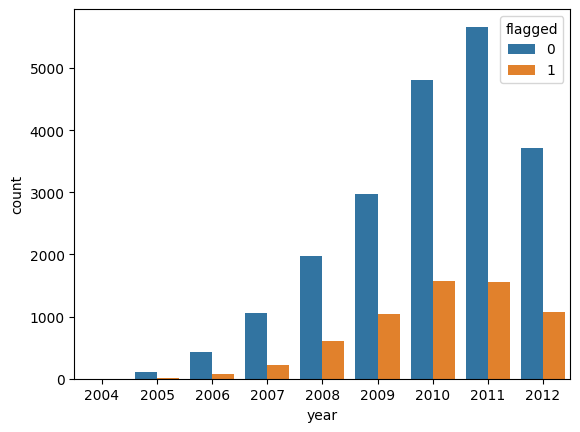

In [86]:
#reviews each year 
sns.countplot(x = 'year', hue = 'flagged', data = num_df_sorted[(num_df_sorted['flagged'] == 1) | (num_df_sorted['flagged'] == 0)])

<Axes: xlabel='month', ylabel='count'>

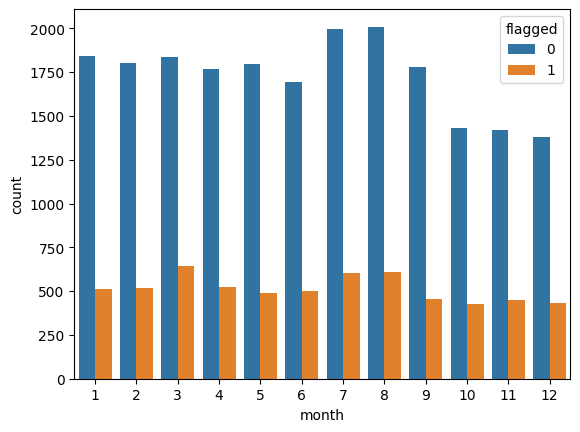

In [87]:
#reviews each month
sns.countplot(x = 'month', hue = 'flagged', data = num_df_sorted[(num_df_sorted['flagged'] == 1) | (num_df_sorted['flagged'] == 0)])

In [88]:
# too many reviewers / restaurants, unfeasible to do individual analysis
# len(num_df_sorted['reviewerID'].unique())
# len(num_df_sorted['restaurantID'].unique())

```Analysis on usefulCount, coolCount, and funnyCount on fraud```

<Axes: xlabel='reviewUsefulCount', ylabel='count'>

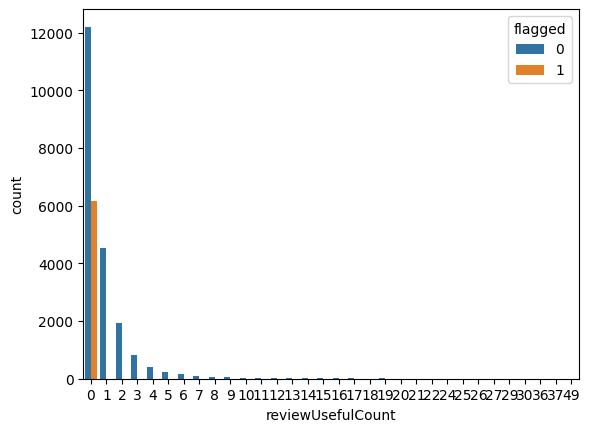

In [89]:
sns.countplot(x = 'reviewUsefulCount', hue = 'flagged', data = num_df_sorted[(num_df_sorted['flagged'] == 1) | (num_df_sorted['flagged'] == 0)])

In [90]:
#number of flagged reviews for reviews that have received 1 or more 'useful' 'cool' or 'funny'
r_useful_flagged = len(num_df_sorted[(num_df_sorted['reviewUsefulCount'] > 0) & (num_df_sorted['flagged'] == 1)])
r_cool_flagged = len(num_df_sorted[(num_df_sorted['reviewCoolCount'] > 0) & (num_df_sorted['flagged'] == 1)])
r_funny_flagged = len(num_df_sorted[(num_df_sorted['reviewFunnyCount'] > 0) & (num_df_sorted['flagged'] == 1)])

print(f'usefulCount >= 1, flagged as fraud: {r_useful_flagged}')
print(f'coolCount >= 1, flagged as fraud: {r_cool_flagged}')
print(f'funnyCount >= 1, flagged as fraud: {r_funny_flagged}')

#number of flagged reviews for reviewers that have received 1 or more 'useful' 'cool' or 'funny'
R_useful_flagged = len(num_df_sorted[(num_df_sorted['reviewerUsefulCount'] > 0) & (num_df_sorted['flagged'] == 1)])
R_cool_flagged = len(num_df_sorted[(num_df_sorted['reviewerCoolCount'] > 0) & (num_df_sorted['flagged'] == 1)])
R_funny_flagged = len(num_df_sorted[(num_df_sorted['reviewerFunnyCount'] > 0) & (num_df_sorted['flagged'] == 1)])

print(f'RusefulCount >= 1, flagged as fraud: {R_useful_flagged}')
print(f'RcoolCount >= 1, flagged as fraud: {R_cool_flagged}')
print(f'RfunnyCount >= 1, flagged as fraud: {R_funny_flagged}')

usefulCount >= 1, flagged as fraud: 0
coolCount >= 1, flagged as fraud: 0
funnyCount >= 1, flagged as fraud: 0
RusefulCount >= 1, flagged as fraud: 3516
RcoolCount >= 1, flagged as fraud: 2193
RfunnyCount >= 1, flagged as fraud: 1923


```Percentage of Flagged Reviews over normal reviews```

<Axes: xlabel='reviewRating', ylabel='count'>

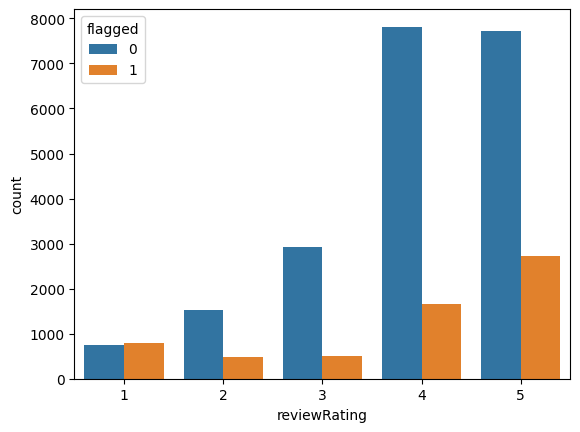

In [91]:
#flagged review count based on rating
sns.countplot(x = 'reviewRating', hue = 'flagged', data = num_df_sorted[(num_df_sorted['flagged'].isin([1, 0]))])

In [92]:
#percentage of fake reviews for each rating
ratio1 = len(num_df_sorted[(num_df_sorted['reviewRating'] == 1) & (num_df_sorted['flagged'] == 1)])/len(num_df_sorted[(num_df_sorted['reviewRating'] == 1)])
print(f'1 star rating: {ratio1*100}%')

ratio2 = len(num_df_sorted[(num_df_sorted['reviewRating'] == 2) & (num_df_sorted['flagged'] == 1)])/len(num_df_sorted[(num_df_sorted['reviewRating'] == 2)])
print(f'2 star rating: {ratio2*100}%')

ratio3 = len(num_df_sorted[(num_df_sorted['reviewRating'] == 3) & (num_df_sorted['flagged'] == 1)])/len(num_df_sorted[(num_df_sorted['reviewRating'] == 3)])
print(f'3 star rating: {ratio3*100}%')

ratio4 = len(num_df_sorted[(num_df_sorted['reviewRating'] == 4) & (num_df_sorted['flagged'] == 1)])/len(num_df_sorted[(num_df_sorted['reviewRating'] == 4)])
print(f'4 star rating: {ratio4*100}%')

ratio5 = len(num_df_sorted[(num_df_sorted['reviewRating'] == 5) & (num_df_sorted['flagged'] == 1)])/len(num_df_sorted[(num_df_sorted['reviewRating'] == 5)])
print(f'5 star rating: {ratio5*100}%')

1 star rating: 51.12976113621691%
2 star rating: 24.00990099009901%
3 star rating: 14.780331684608669%
4 star rating: 17.49366554054054%
5 star rating: 26.063625910310463%


In [93]:
# len(num_df_sorted[(num_df_sorted['rating'] == 1)])
# len(num_df_sorted[(num_df_sorted['rating'] == 1) & (num_df_sorted['flagged'] == 1)])

```Correlation Matrix Implementation```

In [94]:
#changed flagged to numeric boolean
num_df_sorted['flagged_n'] = num_df_sorted['flagged'].apply(lambda x : 0 if x == 0 else 1)

In [95]:
#correlation matrix
corr_matrix = num_df_sorted.corr(numeric_only=True)
print(corr_matrix)

                          flagged  reviewRating  reviewUsefulCount  \
flagged                  1.000000     -0.057327          -0.214217   
reviewRating            -0.057327      1.000000          -0.033269   
reviewUsefulCount       -0.214217     -0.033269           1.000000   
reviewCoolCount         -0.166514      0.063485           0.822516   
reviewFunnyCount        -0.141572     -0.030246           0.724126   
reviewerFriendCount     -0.111628      0.010394           0.388768   
reviewerNumReviews      -0.226103      0.014245           0.381959   
reviewerFirstCount      -0.226103      0.014245           0.381959   
reviewerUsefulCount     -0.114569      0.011620           0.491278   
reviewerCoolCount       -0.097972      0.012505           0.491471   
reviewerFunnyCount      -0.099375      0.012268           0.507740   
reviewerComplimentCount -0.075525      0.015101           0.496143   
reviewerTipCount        -0.092156      0.019263           0.185307   
reviewerFanCount    

```Correlation Matrix Heatmap```

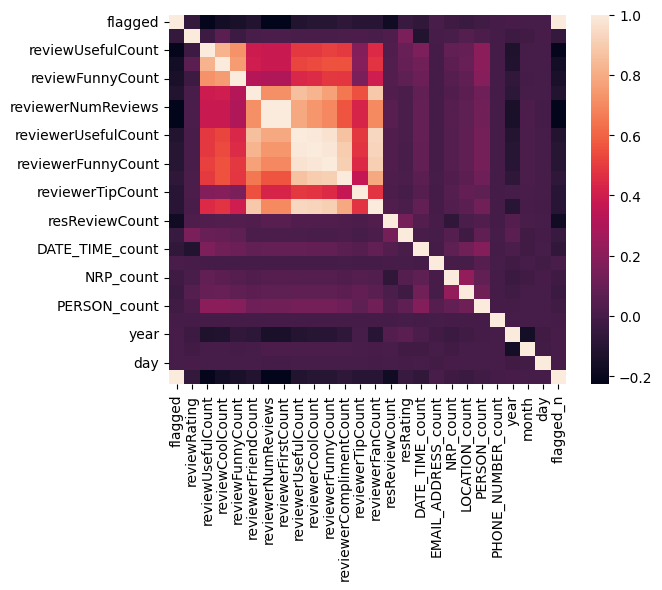

In [96]:
sns.heatmap(corr_matrix)
plt.show()

<Axes: xlabel='PERSON_count', ylabel='count'>

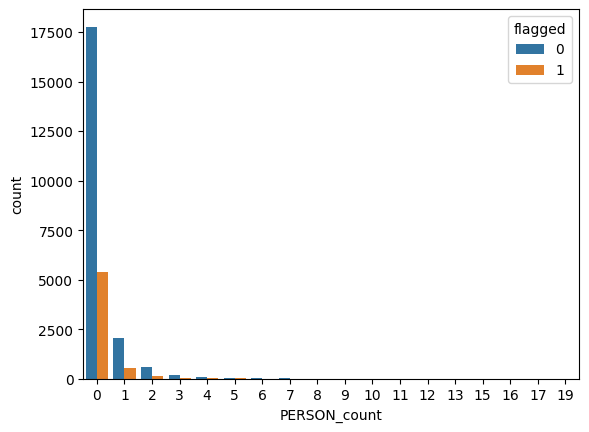

In [97]:
sns.countplot(x = 'PERSON_count', hue = 'flagged', data = num_df_sorted[(num_df_sorted['flagged'] == 1) | (num_df_sorted['flagged'] == 0)])

<Axes: xlabel='DATE_TIME_count', ylabel='count'>

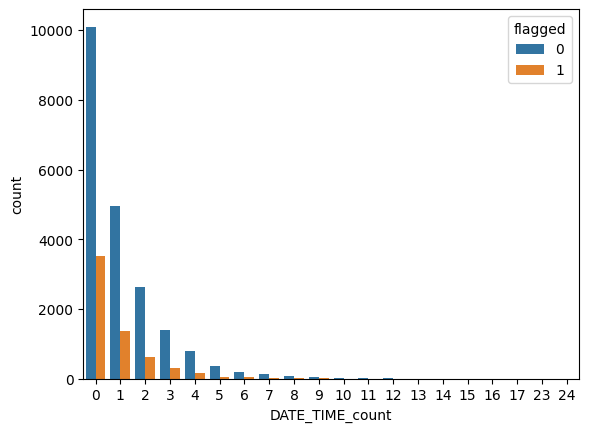

In [98]:
sns.countplot(x = 'DATE_TIME_count', hue = 'flagged', data = num_df_sorted[(num_df_sorted['flagged'] == 1) | (num_df_sorted['flagged'] == 0)])

In [99]:
datetime_flagged = len(num_df_sorted[(num_df_sorted['DATE_TIME_count'] > 0) & (num_df_sorted['flagged'] == 1)].index)
datetime_nflagged = len(num_df_sorted[(num_df_sorted['DATE_TIME_count'] > 0) & (num_df_sorted['flagged'] == 0)].index)

ndatetime_flagged = len(num_df_sorted[(num_df_sorted['DATE_TIME_count'] == 0) & (num_df_sorted['flagged'] == 1)].index)
ndatetime_nflagged = len(num_df_sorted[(num_df_sorted['DATE_TIME_count'] == 0) & (num_df_sorted['flagged'] == 0)].index)

print(f'precentage of flagged reviews with DATETIME = {(datetime_flagged/(datetime_flagged+datetime_nflagged))*100}%')
print(f'precentage of flagged reviews without DATETIME = {(ndatetime_flagged/(ndatetime_flagged+ndatetime_nflagged))*100}%')

precentage of flagged reviews with DATETIME = 19.832969678729967%
precentage of flagged reviews without DATETIME = 25.882698377743523%


In [100]:
location_flagged = len(num_df_sorted[(num_df_sorted['LOCATION_count'] > 0) & (num_df_sorted['flagged'] == 1)].index)
location_nflagged = len(num_df_sorted[(num_df_sorted['LOCATION_count'] > 0) & (num_df_sorted['flagged'] == 0)].index)

nlocation_flagged = len(num_df_sorted[(num_df_sorted['LOCATION_count'] == 0) & (num_df_sorted['flagged'] == 1)].index)
nlocation_nflagged = len(num_df_sorted[(num_df_sorted['LOCATION_count'] == 0) & (num_df_sorted['flagged'] == 0)].index)

print(f'precentage of flagged reviews with LOCATION = {(location_flagged/(location_flagged+location_nflagged))*100}%')
print(f'precentage of flagged reviews without LOCATION = {(nlocation_flagged/(nlocation_flagged+nlocation_nflagged))*100}%')

precentage of flagged reviews with LOCATION = 20.505940973553084%
precentage of flagged reviews without LOCATION = 23.87488866767957%


In [101]:
email_address_flagged = len(num_df_sorted[(num_df_sorted['EMAIL_ADDRESS_count'] > 0) & (num_df_sorted['flagged'] == 1)].index)
email_address_nflagged = len(num_df_sorted[(num_df_sorted['EMAIL_ADDRESS_count'] > 0) & (num_df_sorted['flagged'] == 0)].index)

nemail_address_flagged = len(num_df_sorted[(num_df_sorted['EMAIL_ADDRESS_count'] == 0) & (num_df_sorted['flagged'] == 1)].index)
nemail_address_nflagged = len(num_df_sorted[(num_df_sorted['EMAIL_ADDRESS_count'] == 0) & (num_df_sorted['flagged'] == 0)].index)

print(f'precentage of flagged reviews with EMAIL ADDRESS = {(email_address_flagged/(email_address_flagged+email_address_nflagged))*100}%')
print(f'precentage of flagged reviews without EMAIL ADDRESS = {(nemail_address_flagged/(nemail_address_flagged+nemail_address_nflagged))*100}%')

precentage of flagged reviews with EMAIL ADDRESS = 100.0%
precentage of flagged reviews without EMAIL ADDRESS = 22.892282540036412%


In [102]:
person_flagged = len(num_df_sorted[(num_df_sorted['PERSON_count'] > 0) & (num_df_sorted['flagged'] == 1)].index)
person_nflagged = len(num_df_sorted[(num_df_sorted['PERSON_count'] > 0) & (num_df_sorted['flagged'] == 0)].index)

nperson_flagged = len(num_df_sorted[(num_df_sorted['PERSON_count'] == 0) & (num_df_sorted['flagged'] == 1)].index)
nperson_nflagged = len(num_df_sorted[(num_df_sorted['PERSON_count'] == 0) & (num_df_sorted['flagged'] == 0)].index)

print(f'precentage of flagged reviews with PERSON = {(person_flagged/(person_flagged+person_nflagged))*100}%')
print(f'precentage of flagged reviews without PERSON = {(nperson_flagged/(nperson_flagged+nperson_nflagged))*100}%')

print(email_address_flagged)
print(email_address_nflagged)

precentage of flagged reviews with PERSON = 20.48481619605754%
precentage of flagged reviews without PERSON = 23.285837651122627%
1
0


In [103]:
NRP_flagged = len(num_df_sorted[(num_df_sorted['NRP_count'] > 0) & (num_df_sorted['flagged'] == 1)].index)
NRP_nflagged = len(num_df_sorted[(num_df_sorted['NRP_count'] > 0) & (num_df_sorted['flagged'] == 0)].index)

nNRP_flagged = len(num_df_sorted[(num_df_sorted['NRP_count'] == 0) & (num_df_sorted['flagged'] == 1)].index)
nNRP_nflagged = len(num_df_sorted[(num_df_sorted['NRP_count'] == 0) & (num_df_sorted['flagged'] == 0)].index)

print(f'precentage of flagged reviews with NRP = {(NRP_flagged/(NRP_flagged+NRP_nflagged))*100}%')
print(f'precentage of flagged reviews without NRP = {(nNRP_flagged/(nNRP_flagged+nNRP_nflagged))*100}%')

precentage of flagged reviews with NRP = 21.321882001493652%
precentage of flagged reviews without NRP = 23.28601911123481%


In [104]:
phone_number_flagged = len(num_df_sorted[(num_df_sorted['PHONE_NUMBER_count'] > 0) & (num_df_sorted['flagged'] == 1)].index)
phone_number_nflagged = len(num_df_sorted[(num_df_sorted['PHONE_NUMBER_count'] > 0) & (num_df_sorted['flagged'] == 0)].index)

nphone_number_flagged = len(num_df_sorted[(num_df_sorted['PHONE_NUMBER_count'] == 0) & (num_df_sorted['flagged'] == 1)].index)
nphone_number_nflagged = len(num_df_sorted[(num_df_sorted['PHONE_NUMBER_count'] == 0) & (num_df_sorted['flagged'] == 0)].index)

print(f'precentage of flagged reviews with PHONE NUMBER = {(phone_number_flagged/(phone_number_flagged+phone_number_nflagged))*100}%')
print(f'precentage of flagged reviews without PHONE NUMBER = {(nphone_number_flagged/(nphone_number_flagged+nphone_number_nflagged))*100}%')

print(phone_number_flagged)
print(phone_number_nflagged)

precentage of flagged reviews with PHONE NUMBER = 0.0%
precentage of flagged reviews without PHONE NUMBER = 22.896848989298455%
0
2


<Axes: xlabel='reviewerNumReviews', ylabel='count'>

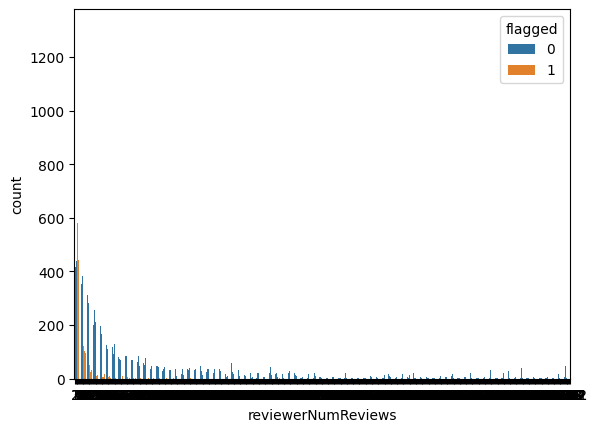

In [105]:
sns.countplot(x = 'reviewerNumReviews', hue = 'flagged', data = num_df_sorted[(num_df_sorted['flagged'] == 1) | (num_df_sorted['flagged'] == 0)])

In [106]:
reviewerNumReviews_causes_flagged = grangercausalitytests(num_df_sorted[['reviewerNumReviews', 'flagged_n']], 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2147  , p=0.6431  , df_denom=26910, df_num=1
ssr based chi2 test:   chi2=0.2147  , p=0.6431  , df=1
likelihood ratio test: chi2=0.2147  , p=0.6431  , df=1
parameter F test:         F=0.2147  , p=0.6431  , df_denom=26910, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5504  , p=0.5767  , df_denom=26907, df_num=2
ssr based chi2 test:   chi2=1.1009  , p=0.5767  , df=2
likelihood ratio test: chi2=1.1009  , p=0.5767  , df=2
parameter F test:         F=0.5504  , p=0.5767  , df_denom=26907, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5254  , p=0.6648  , df_denom=26904, df_num=3
ssr based chi2 test:   chi2=1.5765  , p=0.6647  , df=3
likelihood ratio test: chi2=1.5765  , p=0.6647  , df=3
parameter F test:         F=0.5254  , p=0.6648  , df_denom=26904, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0423  

# Jesper part

Length of each review (how many words and characters in each review)

In [107]:
# Handle NaN values in the 'reviewContent' column (replace with an empty string)
df['reviewContent'].fillna('', inplace=True)

# Calculate word and character counts for each review
df['word_count'] = df['reviewContent'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['reviewContent'].apply(lambda x: len(str(x)))

# Summary statistics for word counts and character counts
word_count_stats = df['word_count'].describe()
char_count_stats = df['char_count'].describe()

print("Word Count Statistics:")
print(word_count_stats)

print("\nCharacter Count Statistics:")
print(char_count_stats)

Word Count Statistics:
count    26956.000000
mean       133.409964
std        119.199309
min          1.000000
25%         53.000000
50%        100.000000
75%        176.000000
max        971.000000
Name: word_count, dtype: float64

Character Count Statistics:
count    26956.000000
mean       724.330798
std        648.884777
min          1.000000
25%        290.000000
50%        540.000000
75%        952.000000
max       4996.000000
Name: char_count, dtype: float64


Word cloud

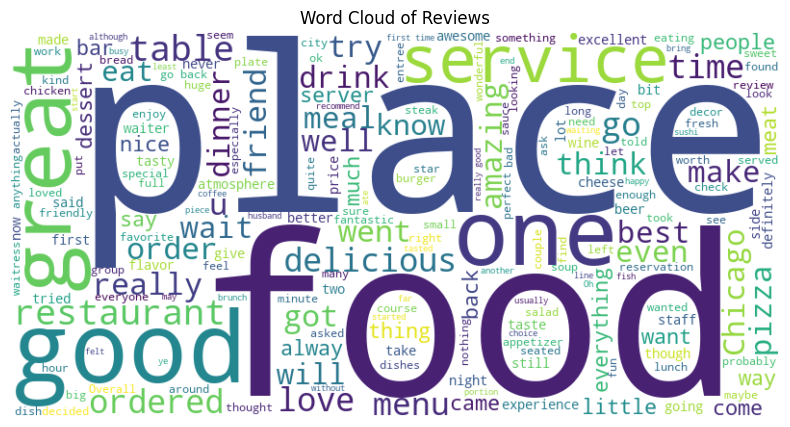

In [108]:
text = " ".join(review for review in df['reviewContent'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display a word cloud for a given subset of data
def generate_word_cloud(flagged_value, df):
    # Filter data for the specified 'flagged' value
    subset_df = df[df['flagged'] == flagged_value]

    # Concatenate all reviews into a single text string
    text = ' '.join(subset_df['reviewContent'].astype(str))

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for flagged={flagged_value}')
    plt.show()

# Generate word cloud for flagged=Y
generate_word_cloud('Y', df)

# Generate word cloud for flagged=N
generate_word_cloud('N', df)

In [109]:
# Tokenization
tokenizer = WordPunctTokenizer()
df['tokens'] = df['reviewContent'].apply(tokenizer.tokenize)

# Define a function to remove stopwords and punctuation
def preprocess_text(tokens):
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in tokens]  # Convert to lowercase
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [word for word in tokens if word not in string.punctuation]  # Remove punctuation
    tokens = [word for word in tokens if len(word) > 1]  # Remove single-character words
    return tokens

# Apply preprocessing to the 'tokens' column
df['clean_tokens'] = df['tokens'].apply(preprocess_text)

# Join the clean tokens back into sentences
df['clean_text'] = df['clean_tokens'].apply(lambda x: ' '.join(x))

N-gram analysis (common phrases)

In [110]:
from nltk.util import ngrams
from collections import Counter
# Define the n-gram range (e.g., 2 for bigrams)
ngram_range = 2  # For bigrams (adjust as needed)

# Function to extract n-grams from a list of tokens
def extract_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Extract n-grams and store them in a new column
df['ngrams'] = df['clean_tokens'].apply(lambda x: extract_ngrams(x, ngram_range))

# Flatten the list of n-grams
all_ngrams = [ngram for ngram_list in df['ngrams'] for ngram in ngram_list]

# Count the frequency of each n-gram
ngram_freq = Counter(all_ngrams)

# Print the most common n-grams and their frequencies
most_common_ngrams = ngram_freq.most_common(10)
for ngram, freq in most_common_ngrams:
    print(f"N-gram: {' '.join(ngram)} - Frequency: {freq}")

N-gram: go back - Frequency: 2121
N-gram: really good - Frequency: 1303
N-gram: first time - Frequency: 1154
N-gram: food good - Frequency: 1143
N-gram: great food - Frequency: 1094
N-gram: deep dish - Frequency: 1061
N-gram: pretty good - Frequency: 1013
N-gram: food great - Frequency: 980
N-gram: great place - Frequency: 941
N-gram: love place - Frequency: 916


Find most common phrases of fake vs real reviews

In [111]:
from nltk.util import ngrams
from collections import Counter

# Define the n-gram range (e.g., 2 for bigrams)
ngram_range = 2  # For bigrams (adjust as needed)

# Function to extract n-grams from a list of tokens
def extract_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Extract n-grams and store them in a new column
df['ngrams'] = df['clean_tokens'].apply(lambda x: extract_ngrams(x, ngram_range))

# Function to find most common n-grams for a specific value of 'flagged'
def most_common_ngrams_for_flagged(flagged_value, df):
    # Filter data for the specified 'flagged' value
    subset_df = df[df['flagged'] == flagged_value]
    
    # Flatten the list of n-grams for the specified subset
    all_ngrams = [ngram for ngram_list in subset_df['ngrams'] for ngram in ngram_list]
    
    # Count the frequency of each n-gram
    ngram_freq = Counter(all_ngrams)
    
    # Print the most common n-grams and their frequencies
    most_common_ngrams = ngram_freq.most_common(10)
    print(f"Most common n-grams for flagged={flagged_value}:")
    for ngram, freq in most_common_ngrams:
        print(f"N-gram: {' '.join(ngram)} - Frequency: {freq}")

# Find most common n-grams for flagged=Y
most_common_ngrams_for_flagged('Y', df)

# Find most common n-grams for flagged=N
most_common_ngrams_for_flagged('N', df)


### Text Reviews Preprocessing

In [112]:
# Download stopwords and wordnet data for NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Stop words
stopwords = nltk.corpus.stopwords.words('english')

# Functions for preprocessing
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def tokenization(text):
    tokens = re.split('\W+',text)
    return tokens

def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

def lemmatizer(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

def preprocess(text):
    text = remove_punctuation(text)
    text = text.lower()
    text = tokenization(text)
    text = remove_stopwords(text)
    text = lemmatizer(text)
    return text

# Apply preprocessing
df['preprocessed'] = df['reviewContent'].apply(lambda x: preprocess(x))

print(df[['reviewContent', 'preprocessed']])

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/admin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                           reviewContent  \
0      Unlike Next, which we'd eaten at the previous ...   
1      Probably one of the best meals I've had ever. ...   
2      Service was impeccable. Experience and present...   
3      The problem with places like this, given the e...   
4      I have no idea how to write my review - dining...   
...                                                  ...   
26951  It's Taco Bell, with higher prices, but it's T...   
26952  Yellow Rose is a favorite of mine. I'd go ther...   
26953  Not bad. We ate there because the odd wicker s...   
26954  We were surprised to have been eagerly roped i...   
26955  A gorgeous shy young teen asked the owner if s...   

                                            preprocessed  
0      [unlike, next, wed, eaten, previous, night, di...  
1      [probably, one, best, meal, ive, ever, perform...  
2      [service, impeccable, experience, presentation...  
3      [problem, place, like, given, exhorb

In [119]:
df["flagged"] = df["flagged"].replace({"N":0, "Y": 1})

### Comparing Topics between Fradulent and Non-Fradulent Class

/var/folders/1t/nll74_0j61918pgb1cz1kwsr0000gn/T/ipykernel_8905/2888253936.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["flagged"]==0]["main_topic"], shade=True, color="green", label="Genuine", ax=ax)
/var/folders/1t/nll74_0j61918pgb1cz1kwsr0000gn/T/ipykernel_8905/2888253936.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["flagged"]==1]["main_topic"], shade=True, color="blue", label="Fraudulent", ax=ax)


Text(0.5, 0.98, 'Main Topic vs Fraud Class')

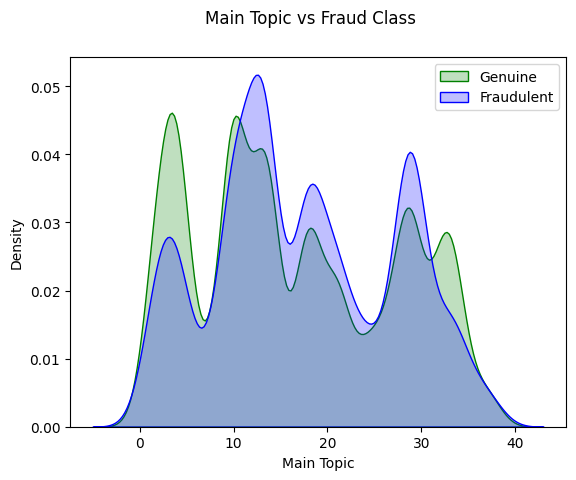

In [120]:
fig, ax = plt.subplots()
sns.kdeplot(df[df["flagged"]==0]["main_topic"], shade=True, color="green", label="Genuine", ax=ax)

sns.kdeplot(df[df["flagged"]==1]["main_topic"], shade=True, color="blue", label="Fraudulent", ax=ax)
ax.set_xlabel("Main Topic")
ax.set_ylabel("Density")
ax.legend()
fig.suptitle("Main Topic vs Fraud Class")

In [121]:
# df.to_csv("Preprocessed_data.csv")

### Creating BoxPlot Function 

In [122]:
def new_boxplot(x,y,data,title,ylabel, xlabel):
    # Create a new figure and axis object
    fig, ax = plt.subplots()

    # Plot the boxplot on the axis object
    sns.boxplot(x=x, y=y, data=data, palette={1: "red", 0: "green"}, ax=ax)
    

    # Set the title and axis labels
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)

    # Display the plot
    plt.show()

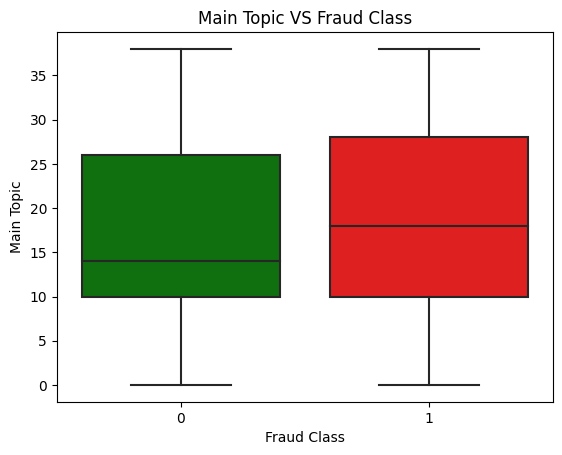

In [123]:
new_boxplot("flagged", "main_topic", df, "Main Topic VS Fraud Class", "Main Topic", "Fraud Class")


In [124]:
description = df.groupby('flagged')['main_topic'].describe()
print(description)

           count       mean        std  min   25%   50%   75%   max
flagged                                                            
0        20752.0  16.552814  10.475505  0.0  10.0  14.0  26.0  38.0
1         6204.0  17.408930   9.599152  0.0  10.0  18.0  28.0  38.0


### Visualisations on the number of characters in the review texts

In [125]:
# Create new Df to store these features 
reviewFeatures = pd.DataFrame()

In [126]:
num_chars = df["reviewContent"].apply(lambda x: len(x))
num_chars.describe()

count    26956.000000
mean       724.330798
std        648.884777
min          1.000000
25%        290.000000
50%        540.000000
75%        952.000000
max       4996.000000
Name: reviewContent, dtype: float64

In [127]:
reviewFeatures["Num_Chars"] = num_chars


In [128]:
num_char_real = df[df["flagged"]==0]["reviewContent"].apply(lambda x: len(x))
num_char_flagged = df[df["flagged"]==1]["reviewContent"].apply(lambda x: len(x))


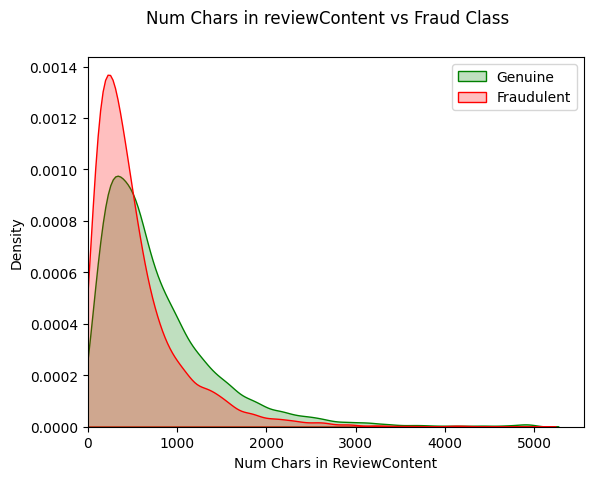

In [129]:
density_plot(num_char_real, num_char_flagged, "Num Chars in ReviewContent", "Density", "Num Chars in reviewContent vs Fraud Class")

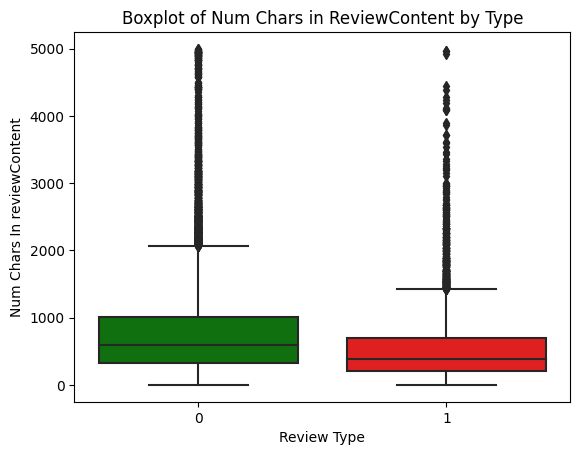

In [130]:
lengths = num_char_real.tolist() + num_char_flagged.tolist()
labels = [0] * len(num_char_real) + [1] * len(num_char_flagged)
num_char_data = pd.DataFrame({
    'Num Chars In ReviewContent': lengths,
    'Review Type': labels
})

new_boxplot(labels,lengths,num_char_data,"Boxplot of Num Chars in ReviewContent by Type","Num Chars In reviewContent", "Review Type")

In [131]:
real_mean = num_char_real.describe()
flagged_mean = num_char_flagged.describe()

compare = pd.DataFrame({"Genuine": real_mean, "Fradulent": flagged_mean})
compare = compare.round(2)
compare

,Genuine,Fradulent
count,20752.00,6204.00
mean,777.34,547.03
std,672.19,526.57
min,1.00,1.00
25%,324.00,210.00
50%,590.00,392.00
75%,1018.00,695.00
max,4996.00,4965.00


### Visualisations on the length of words in the review texts

In [132]:
num_words_per_review = df["reviewContent"].apply(lambda x: len(x.split()))
num_words_per_review.describe()

count    26956.000000
mean       133.409964
std        119.199309
min          1.000000
25%         53.000000
50%        100.000000
75%        176.000000
max        971.000000
Name: reviewContent, dtype: float64

In [133]:
reviewFeatures["Num_Words"] = num_words_per_review

In [134]:
length_text_real = df[df["flagged"]==0]["reviewContent"].apply(lambda x: len(x.split()))
length_text_flagged = df[df["flagged"]==1]["reviewContent"].apply(lambda x: len(x.split()))


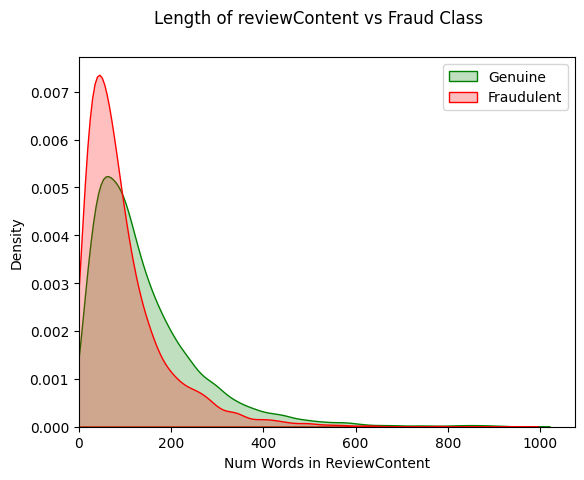

In [135]:
density_plot(length_text_real, length_text_flagged, "Num Words in ReviewContent", "Density","Length of reviewContent vs Fraud Class")

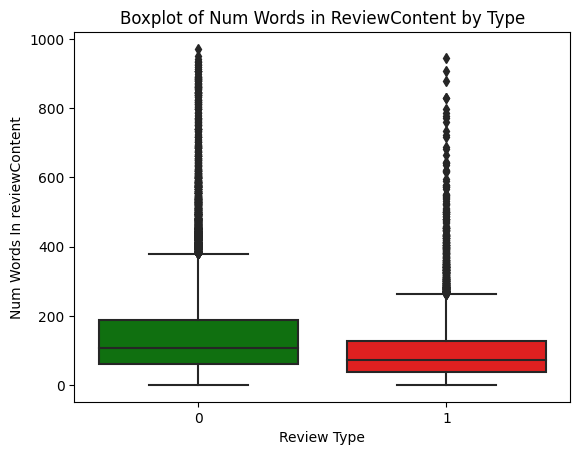

In [136]:
lengths = length_text_real.tolist() + length_text_flagged.tolist()
labels = [0] * len(length_text_real) + [1] * len(length_text_flagged)
num_words_data = pd.DataFrame({
    'Num Words In ReviewContent': lengths,
    'Review Type': labels
})

new_boxplot(labels,lengths,num_words_data,"Boxplot of Num Words in ReviewContent by Type","Num Words In reviewContent", "Review Type")

In [137]:
num_words_data

,Num Words In ReviewContent,Review Type
0,871,0
1,66,0
2,45,0
3,358,0
4,172,0
...,...,...
26951,93,1
26952,117,1
26953,196,1
26954,61,1


In [138]:
real_mean = length_text_real.describe()
flagged_mean = length_text_flagged.describe()

compare = pd.DataFrame({"Genuine": real_mean, "Fradulent": flagged_mean})
compare = compare.round(2)
compare

,Genuine,Fradulent
count,20752.00,6204.00
mean,143.16,100.81
std,123.34,97.31
min,1.00,1.00
25%,60.00,38.00
50%,109.00,72.00
75%,188.00,128.00
max,971.00,946.00


##### As seen from the above plots and the statistical comparison between the number of words in the reviewContent differs quite strongly for the 2 classes. Thus, we will be adding this feature as a new column

In [139]:
from collections import Counter
def punctuation_count(text):
    return Counter(char for char in text if char in string.punctuation)
total_punc = df["reviewContent"].apply(punctuation_count)


# Apply the function to each review
punctuation_count_real = df[df["flagged"] == 0]["reviewContent"].apply(punctuation_count)
punctuation_count_flagged = df[df["flagged"] == 1]["reviewContent"].apply(punctuation_count)

# If you want to get the total number of punctuation marks for each review, you can sum the Counter objects
total_punctuation_real = punctuation_count_real.apply(lambda x: sum(x.values()))
total_punctuation_flagged = punctuation_count_flagged.apply(lambda x: sum(x.values()))
total_punc_count = total_punc.apply(lambda x: sum(x.values()))


In [140]:
reviewFeatures["Total_Punc"] = total_punc_count

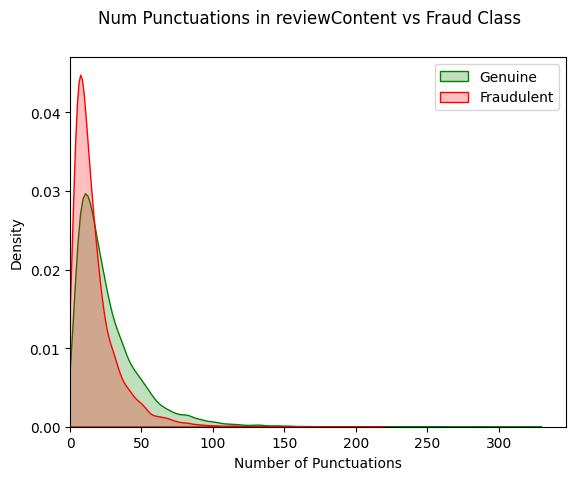

In [141]:
density_plot(total_punctuation_real, total_punctuation_flagged, "Number of Punctuations", "Density","Num Punctuations in reviewContent vs Fraud Class")

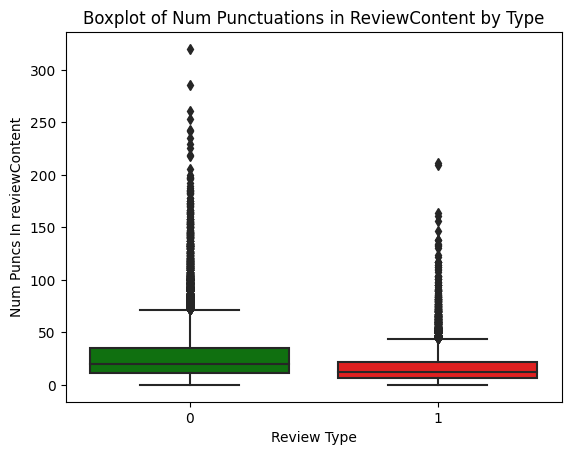

In [142]:
lengths = total_punctuation_real.tolist() + total_punctuation_flagged.tolist()
labels = [0] * len(total_punctuation_real) + [1] * len(total_punctuation_flagged)
num_words_data = pd.DataFrame({
    'Num Punctuations In ReviewContent': lengths,
    'Review Type': labels
})

new_boxplot(labels,lengths,num_words_data,"Boxplot of Num Punctuations in ReviewContent by Type","Num Puncs In reviewContent", "Review Type")

In [143]:
real_mean = total_punctuation_real.describe()
flagged_mean = total_punctuation_flagged.describe()

compare = pd.DataFrame({"Genuine": real_mean, "Fradulent": flagged_mean})
compare = compare.round(2)
compare

,Genuine,Fradulent
count,20752.00,6204.00
mean,26.77,17.43
std,24.41,17.20
min,0.00,0.00
25%,11.00,7.00
50%,20.00,12.00
75%,35.00,22.00
max,320.00,211.00


#### Num Capitalized Words

In [144]:
def find_num_capitalized_words(text):
    return sum(1 for word in text.split() if word.isupper())
total_cap = df["reviewContent"].apply(find_num_capitalized_words)
cap_count_real = df[df["flagged"] == 0]["reviewContent"].apply(find_num_capitalized_words)
cap_count_flagged = df[df["flagged"] == 1]["reviewContent"].apply(find_num_capitalized_words)
cap_count_real

0         5
1         0
2         2
3        11
4         4
         ..
26951     3
26952     4
26953     0
26954     0
26955     1
Name: reviewContent, Length: 20752, dtype: int64

In [145]:
reviewFeatures["Num_Cap_Words"] = total_cap

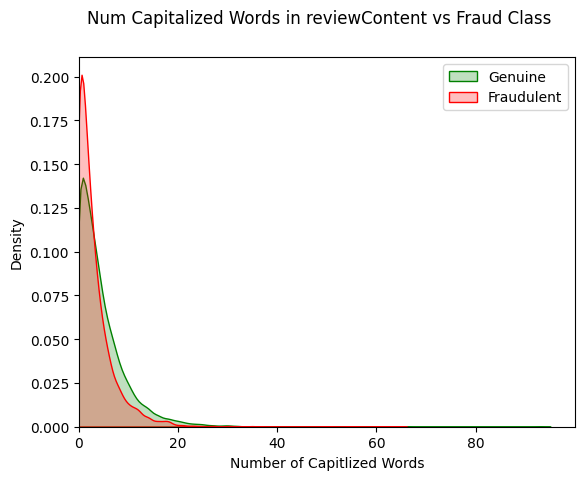

In [146]:
density_plot(cap_count_real, cap_count_flagged, "Number of Capitlized Words", "Density","Num Capitalized Words in reviewContent vs Fraud Class")

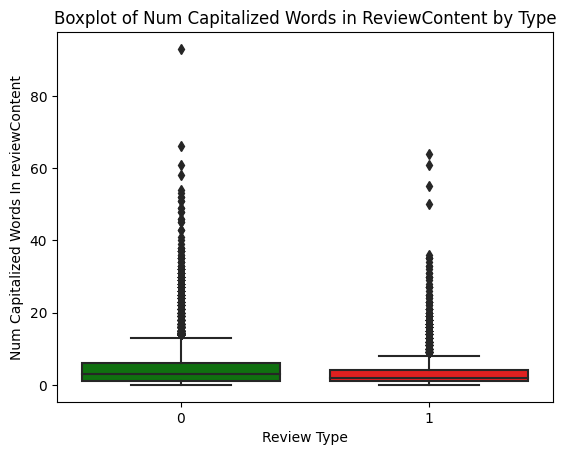

In [147]:
lengths = cap_count_real.tolist() + cap_count_flagged.tolist()
labels = [0] * len(cap_count_real) + [1] * len(cap_count_flagged)
num_words_data = pd.DataFrame({
    'Num Capitalized Words In ReviewContent': lengths,
    'Review Type': labels
})

new_boxplot(labels,lengths,num_words_data,"Boxplot of Num Capitalized Words in ReviewContent by Type","Num Capitalized Words In reviewContent", "Review Type")

In [148]:
real_mean = cap_count_real.describe()
flagged_mean = cap_count_flagged.describe()

compare = pd.DataFrame({"Genuine": real_mean, "Fradulent": flagged_mean})
compare = compare.round(2)
compare

,Genuine,Fradulent
count,20752.00,6204.00
mean,4.61,3.16
std,5.13,4.19
min,0.00,0.00
25%,1.00,1.00
50%,3.00,2.00
75%,6.00,4.00
max,93.00,64.00


##### Number of Capitalized Chars

In [149]:
def find_num_capitalized_char(text):
    return sum(1 for word in text if word.isupper())
total_cap_char = df["reviewContent"].apply(find_num_capitalized_char)
cap_char_count_real = df[df["flagged"] == 0]["reviewContent"].apply(find_num_capitalized_char)
cap_char_count_flagged = df[df["flagged"] == 1]["reviewContent"].apply(find_num_capitalized_char)


In [150]:
reviewFeatures["Num_Cap_Char"] = total_cap_char

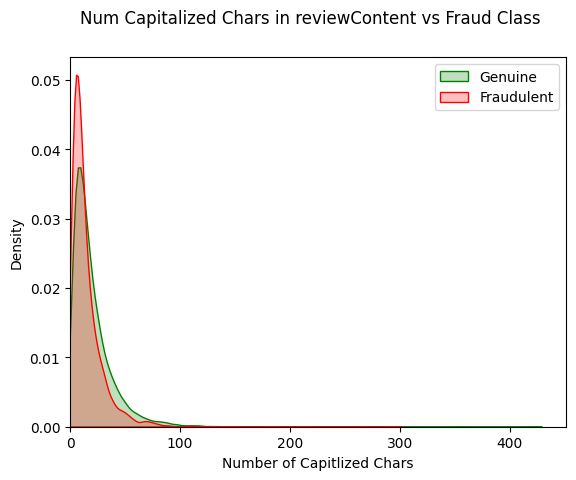

In [151]:
density_plot(cap_char_count_real, cap_char_count_flagged, "Number of Capitlized Chars", "Density","Num Capitalized Chars in reviewContent vs Fraud Class")

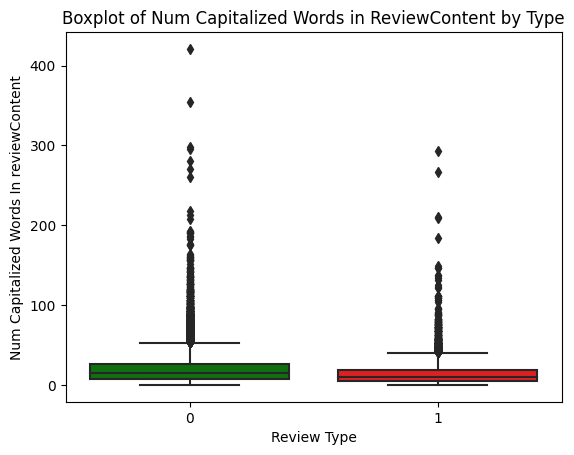

In [152]:
lengths = cap_char_count_real.tolist() + cap_char_count_flagged.tolist()
labels = [0] * len(cap_char_count_real) + [1] * len(cap_char_count_flagged)
num_words_data = pd.DataFrame({
    'Num Capitalized Words In ReviewContent': lengths,
    'Review Type': labels
})

new_boxplot(labels,lengths,num_words_data,"Boxplot of Num Capitalized Words in ReviewContent by Type","Num Capitalized Words In reviewContent", "Review Type")

In [153]:
reviewFeatures

,Num_Chars,Num_Words,Total_Punc,Num_Cap_Words,Num_Cap_Char
0,4890,871,143,5,53
1,350,66,10,0,9
2,257,45,9,2,7
3,2156,358,84,11,73
4,951,172,29,4,11
...,...,...,...,...,...
26951,512,96,16,3,12
26952,522,102,17,4,19
26953,209,38,8,0,6
26954,347,63,12,0,6


#### Correlation Matrix between the Features 

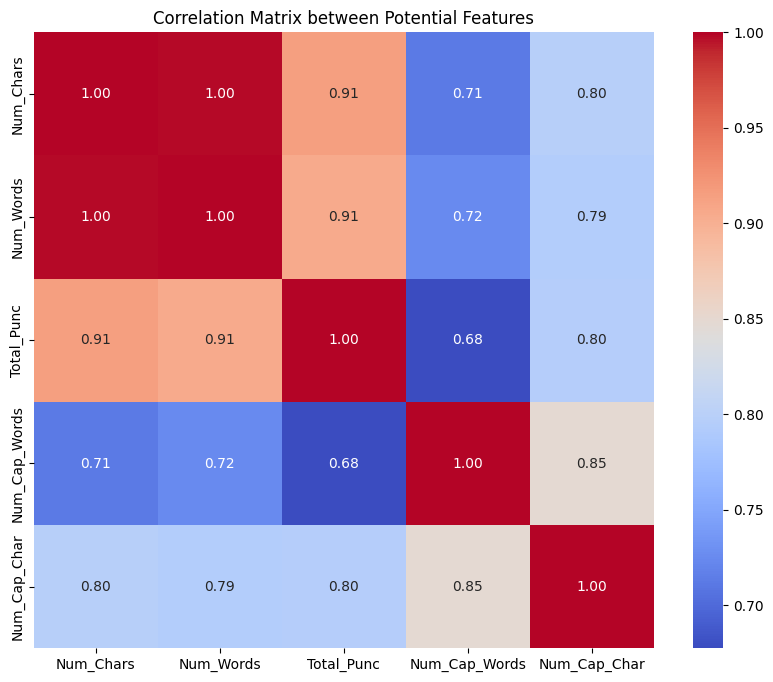

In [154]:
features_matrix = reviewFeatures.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(features_matrix, annot=True, fmt=".2f", cmap='coolwarm', )
plt.title("Correlation Matrix between Potential Features")
plt.show()

In [155]:
reviewFeatures["Y"] = df["flagged"]
reviewFeatures["Y"].value_counts()

Y
0    20752
1     6204
Name: count, dtype: int64

##### From the correlation matrix, we can see that the Num_Chars and Num_Words are perfectly correlated. Total_Punc is also highly correlated with Num_Chars and Num_Words. We shall thus select Total_Puncs given the greater difference in punctuations between the 2 classes based on the earlier visualisations. Besides, Num_Cap_Words and Num_Cap_Char have an evidently and logically high correlation with each other. Given Num_Cap_Words lower correlation with Total_Punc, we decide to keep Num_Cap_Words

#### Feature Importance using Logistic Regression 

In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = reviewFeatures.drop('Y', axis=1)
y = reviewFeatures['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 25% test set 

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train) # standardize features 
X_test_scaled = ss.transform(X_test) # same scaling 


In [157]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0] #.coef_ returns array of shape (1, n_features)
})
importances = importances.sort_values(by='Importance', ascending=False)

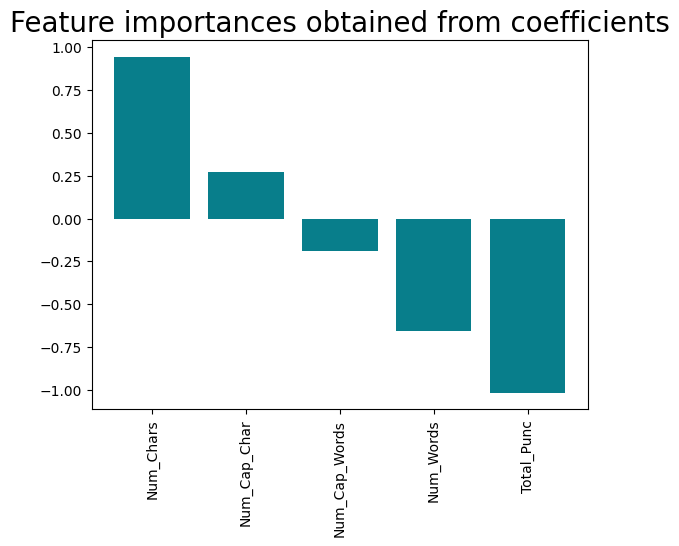

In [158]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### From this feature importance, Total_Punc and Num_Chars seem to be important features as they have highly positive and negative values respectively, indicating that they are strong predictors in this model

In [159]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

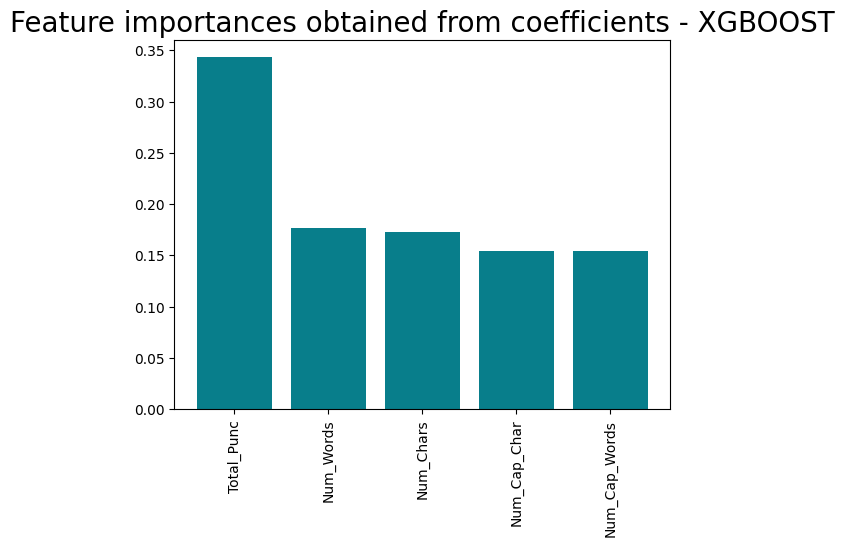

In [160]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients - XGBOOST', size=20)
plt.xticks(rotation='vertical')
plt.show()

#####  Upon the overall analysis, the columns Total punc and Num Chars would be added to the dataframe considering the factors of multicollinearity and feature importance

### POS Tagger

In [161]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/admin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [162]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from collections import Counter

def count_pos(text):
    #tokenize into words 
    words = word_tokenize(text)

    # pos for each word 
    pos_tags = nltk.pos_tag(words)

    tags = [tag for word, tag in pos_tags]

    tag_freq = Counter(tags)

    return pd.Series({
        'noun_count': sum(freq for tag, freq in tag_freq.items() if tag.startswith('NN')),
        'verb_count': sum(freq for tag, freq in tag_freq.items() if tag.startswith('VB')),
        'adj_count': sum(freq for tag, freq in tag_freq.items() if tag.startswith('JJ'))
    })


In [163]:
# getting 100 fraud and 100 genuind each to achieve balanced sample
fraud_df = df[df['flagged'] == 1]
genuine_df = df[df['flagged'] == 0]
fraud_sample = fraud_df.sample(n=100, random_state=1)
genuine_sample = genuine_df.sample(n=100, random_state=1)
sample_df = pd.concat([fraud_sample, genuine_sample])
balanced_sample_df = sample_df.sample(frac=1, random_state=1).reset_index(drop=True)

In [164]:
pos_counts = balanced_sample_df["reviewContent"].apply(count_pos)
balanced_sample_df = pd.concat([balanced_sample_df, pos_counts],axis=1)


In [165]:
balanced_sample_df

,reviewDate,reviewID,reviewerID,reviewContent,reviewRating,reviewUsefulCount,reviewCoolCount,reviewFunnyCount,restaurantID,flagged,...,char_count,tokens,clean_tokens,clean_text,ngrams,preprocessed,main_topic,noun_count,verb_count,adj_count
0,7/29/2011,eaOIZI_7_MIscsDtIV85fg,f3U7oi4gLKrYiZCLneYYUw,I have been to this restaurant several times a...,3,0,0,0,3Mx2PM7v8qjqhgF3cDXxbQ,1,...,208,"[I, have, been, to, this, restaurant, several,...","[restaurant, several, times, every, time, come...",restaurant several times every time come servi...,"[(restaurant, several), (several, times), (tim...","[restaurant, several, time, every, time, come,...",29,8,9,4
1,3/10/2009,IOXWfrCbmgH_8JFI5rmIlA,fgsP9uvZa0tK0jz2JGY1aQ,Went for lunch during the week. The lunch menu...,3,0,0,0,rnjz2KNgsQ2YaC_kjeuuAQ,1,...,202,"[Went, for, lunch, during, the, week, ., The, ...","[went, lunch, week, lunch, menu, offers, reaso...",went lunch week lunch menu offers reasonable p...,"[(went, lunch), (lunch, week), (week, lunch), ...","[went, lunch, week, lunch, menu, offer, reason...",7,11,4,9
2,10/17/2010,angg6YMg4Z4JdN0F5EOn5A,5t3XTDbZAUSElqn7-eNXEg,My husband and I went to Lockdown on a Sunday ...,5,0,0,0,oCTlReyKjJxKPFYfCurxxQ,1,...,602,"[My, husband, and, I, went, to, Lockdown, on, ...","[husband, went, lockdown, sunday, around, 30, ...",husband went lockdown sunday around 30 great e...,"[(husband, went), (went, lockdown), (lockdown,...","[husband, went, lockdown, sunday, around, 430,...",10,26,25,7
3,7/29/2010,3kOrKh6l4Itgzwhx3oM5NQ,vnatfj35e3BvJJz8XL6dzg,Met up with a few friends for a Saturday brunc...,4,0,0,0,WaIbupMGDBi5B3SChsUH8A,0,...,476,"[Met, up, with, a, few, friends, for, a, Satur...","[met, friends, saturday, brunch, hangover, rel...",met friends saturday brunch hangover relief ca...,"[(met, friends), (friends, saturday), (saturda...","[met, friend, saturday, brunchhangover, relief...",10,21,17,5
4,9/21/2010,aI39UtF2Wi2zhcq4hmHVig,KlG0SbFFnGkQpCx3kozgPw,A date suggested this place and I was absolute...,5,2,0,0,WaIbupMGDBi5B3SChsUH8A,0,...,376,"[A, date, suggested, this, place, and, I, was,...","[date, suggested, place, absolutely, enthralle...",date suggested place absolutely enthralled gre...,"[(date, suggested), (suggested, place), (place...","[date, suggested, place, absolutely, enthralle...",18,9,17,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,10/13/2008,PKxEXcWkWHorW63tRyO-7Q,BYs8IIVtYT4aQ32qXf_Zrg,I love breakfast and this was definitely a goo...,4,0,0,0,CwPi6NVuJIZZx4IBcTekFQ,0,...,356,"[I, love, breakfast, and, this, was, definitel...","[love, breakfast, definitely, good, spot, trie...",love breakfast definitely good spot tried stra...,"[(love, breakfast), (breakfast, definitely), (...","[love, breakfast, definitely, good, spot, trie...",24,13,14,9
196,6/25/2010,3ZAxdHwg5qond,hlFD_c_AyPTVsdqZrqrCyQ,I once went here twice in one weekend (for din...,5,0,0,0,WaIbupMGDBi5B3SChsUH8A,0,...,835,"[I, once, went, here, twice, in, one, weekend,...","[went, twice, one, weekend, dinner, brunch, )....",went twice one weekend dinner brunch ). good s...,"[(went, twice), (twice, one), (one, weekend), ...","[went, twice, one, weekend, dinner, brunch, go...",7,45,23,9
197,6/8/2011,nvaLESe09mNy5sOCWPXVHA,M6EZly--b7gHzwIcWzC0Uw,"For pictures and more information, please to g...",4,0,0,0,z_qEuUuRWIq4O-YufXHf1w,1,...,750,"[For, pictures, and, more, information, ,, ple...","[pictures, information, please, go, http, ://,...",pictures information please go http :// rollin...,"[(pictures, information), (information, please...","[picture, information, please, go, httprolling...",28,25,27,19
198,4/15/2010,M1Qp0YEAO,z7PyvXCkkT6uz2zoo3Hv2A,"YUM YUM YUM After giving up cheese for Lent, p...",5,2,2,1,tW2jfL-qMccAYZSghPBbHA,0,...,534,"[YUM, YUM, YUM, After, giving, up, cheese, for...","[yum, yum, yum, giving, cheese, lent, pizza, o...",yum yum yum giving cheese lent pizza one first...,"[(yum, yum), (yum, yum), (yum, giving)

In [166]:
balanced_sample_df

,reviewDate,reviewID,reviewerID,reviewContent,reviewRating,reviewUsefulCount,reviewCoolCount,reviewFunnyCount,restaurantID,flagged,...,char_count,tokens,clean_tokens,clean_text,ngrams,preprocessed,main_topic,noun_count,verb_count,adj_count
0,7/29/2011,eaOIZI_7_MIscsDtIV85fg,f3U7oi4gLKrYiZCLneYYUw,I have been to this restaurant several times a...,3,0,0,0,3Mx2PM7v8qjqhgF3cDXxbQ,1,...,208,"[I, have, been, to, this, restaurant, several,...","[restaurant, several, times, every, time, come...",restaurant several times every time come servi...,"[(restaurant, several), (several, times), (tim...","[restaurant, several, time, every, time, come,...",29,8,9,4
1,3/10/2009,IOXWfrCbmgH_8JFI5rmIlA,fgsP9uvZa0tK0jz2JGY1aQ,Went for lunch during the week. The lunch menu...,3,0,0,0,rnjz2KNgsQ2YaC_kjeuuAQ,1,...,202,"[Went, for, lunch, during, the, week, ., The, ...","[went, lunch, week, lunch, menu, offers, reaso...",went lunch week lunch menu offers reasonable p...,"[(went, lunch), (lunch, week), (week, lunch), ...","[went, lunch, week, lunch, menu, offer, reason...",7,11,4,9
2,10/17/2010,angg6YMg4Z4JdN0F5EOn5A,5t3XTDbZAUSElqn7-eNXEg,My husband and I went to Lockdown on a Sunday ...,5,0,0,0,oCTlReyKjJxKPFYfCurxxQ,1,...,602,"[My, husband, and, I, went, to, Lockdown, on, ...","[husband, went, lockdown, sunday, around, 30, ...",husband went lockdown sunday around 30 great e...,"[(husband, went), (went, lockdown), (lockdown,...","[husband, went, lockdown, sunday, around, 430,...",10,26,25,7
3,7/29/2010,3kOrKh6l4Itgzwhx3oM5NQ,vnatfj35e3BvJJz8XL6dzg,Met up with a few friends for a Saturday brunc...,4,0,0,0,WaIbupMGDBi5B3SChsUH8A,0,...,476,"[Met, up, with, a, few, friends, for, a, Satur...","[met, friends, saturday, brunch, hangover, rel...",met friends saturday brunch hangover relief ca...,"[(met, friends), (friends, saturday), (saturda...","[met, friend, saturday, brunchhangover, relief...",10,21,17,5
4,9/21/2010,aI39UtF2Wi2zhcq4hmHVig,KlG0SbFFnGkQpCx3kozgPw,A date suggested this place and I was absolute...,5,2,0,0,WaIbupMGDBi5B3SChsUH8A,0,...,376,"[A, date, suggested, this, place, and, I, was,...","[date, suggested, place, absolutely, enthralle...",date suggested place absolutely enthralled gre...,"[(date, suggested), (suggested, place), (place...","[date, suggested, place, absolutely, enthralle...",18,9,17,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,10/13/2008,PKxEXcWkWHorW63tRyO-7Q,BYs8IIVtYT4aQ32qXf_Zrg,I love breakfast and this was definitely a goo...,4,0,0,0,CwPi6NVuJIZZx4IBcTekFQ,0,...,356,"[I, love, breakfast, and, this, was, definitel...","[love, breakfast, definitely, good, spot, trie...",love breakfast definitely good spot tried stra...,"[(love, breakfast), (breakfast, definitely), (...","[love, breakfast, definitely, good, spot, trie...",24,13,14,9
196,6/25/2010,3ZAxdHwg5qond,hlFD_c_AyPTVsdqZrqrCyQ,I once went here twice in one weekend (for din...,5,0,0,0,WaIbupMGDBi5B3SChsUH8A,0,...,835,"[I, once, went, here, twice, in, one, weekend,...","[went, twice, one, weekend, dinner, brunch, )....",went twice one weekend dinner brunch ). good s...,"[(went, twice), (twice, one), (one, weekend), ...","[went, twice, one, weekend, dinner, brunch, go...",7,45,23,9
197,6/8/2011,nvaLESe09mNy5sOCWPXVHA,M6EZly--b7gHzwIcWzC0Uw,"For pictures and more information, please to g...",4,0,0,0,z_qEuUuRWIq4O-YufXHf1w,1,...,750,"[For, pictures, and, more, information, ,, ple...","[pictures, information, please, go, http, ://,...",pictures information please go http :// rollin...,"[(pictures, information), (information, please...","[picture, information, please, go, httprolling...",28,25,27,19
198,4/15/2010,M1Qp0YEAO,z7PyvXCkkT6uz2zoo3Hv2A,"YUM YUM YUM After giving up cheese for Lent, p...",5,2,2,1,tW2jfL-qMccAYZSghPBbHA,0,...,534,"[YUM, YUM, YUM, After, giving, up, cheese, for...","[yum, yum, yum, giving, cheese, lent, pizza, o...",yum yum yum giving cheese lent pizza one first...,"[(yum, yum), (yum, yum), (yum, giving)

#### Noun Counts 

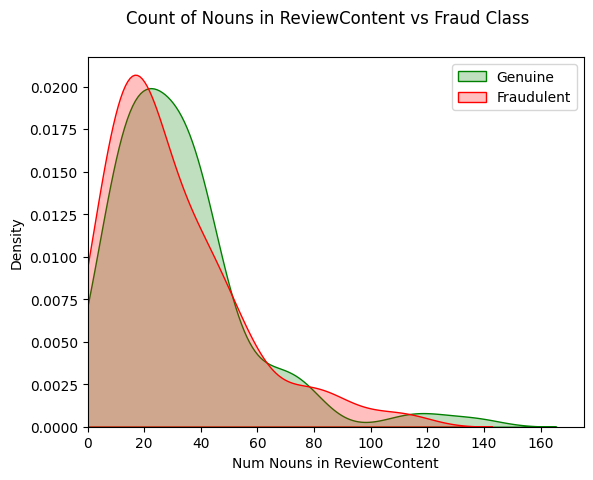

In [167]:
fraud_rows = balanced_sample_df[balanced_sample_df["flagged"]== 1]
gen_rows = balanced_sample_df[balanced_sample_df["flagged"]== 0]
fraud_noun = fraud_rows["noun_count"]
gen_noun = gen_rows["noun_count"]
density_plot(gen_noun, fraud_noun, "Num Nouns in ReviewContent", "Density","Count of Nouns in ReviewContent vs Fraud Class")
# density_plot(gen_noun, fraud_noun, "NounCount for Review Content," "Density", "Noun Count VS Fraud Class")


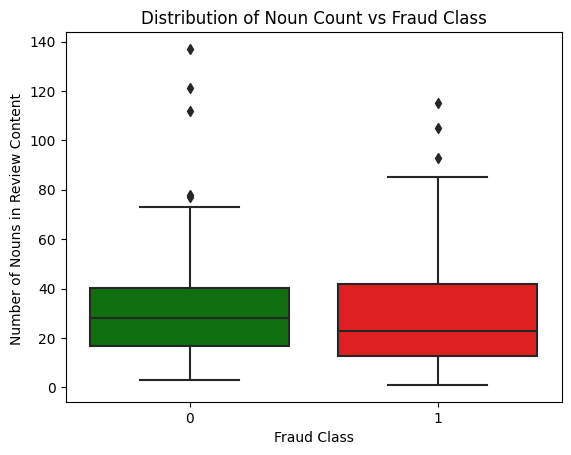

In [168]:
fig, ax = plt.subplots()

# Plot the boxplot on the axis object
sns.boxplot(x="flagged", y="noun_count", data=balanced_sample_df, palette={1: "red", 0: "green"}, ax=ax)

# Set the title and axis labels
ax.set_title("Distribution of Noun Count vs Fraud Class")
ax.set_ylabel("Number of Nouns in Review Content ")
ax.set_xlabel("Fraud Class")

# Display the plot
plt.show()

#### Verb Count 

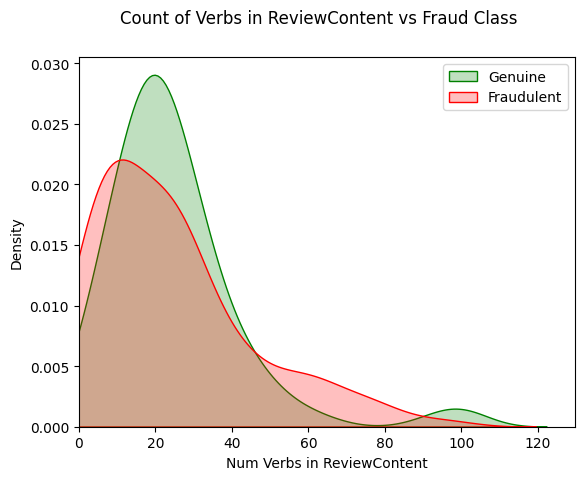

In [169]:
fraud_rows = balanced_sample_df[balanced_sample_df["flagged"]== 1]
gen_rows = balanced_sample_df[balanced_sample_df["flagged"]== 0]
fraud_verb = fraud_rows["verb_count"]
gen_verb = gen_rows["verb_count"]
density_plot(gen_verb, fraud_verb, "Num Verbs in ReviewContent", "Density","Count of Verbs in ReviewContent vs Fraud Class")
# density_plot(gen_noun, fraud_noun, "NounCount for Review Content," "Density", "Noun Count VS Fraud Class")


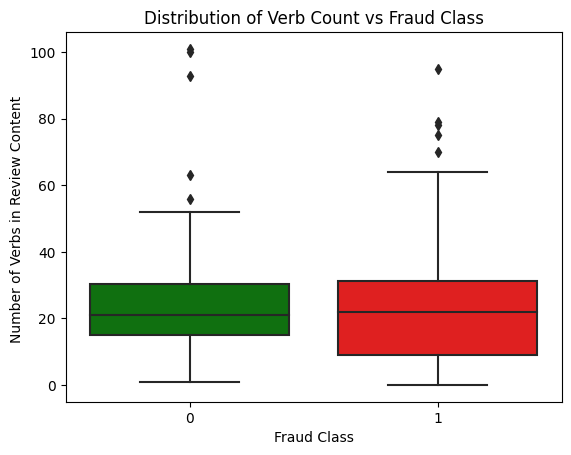

In [170]:
fig, ax = plt.subplots()

# Plot the boxplot on the axis object
sns.boxplot(x="flagged", y="verb_count", data=balanced_sample_df, palette={1: "red", 0: "green"}, ax=ax)

# Set the title and axis labels
ax.set_title("Distribution of Verb Count vs Fraud Class")
ax.set_ylabel("Number of Verbs in Review Content ")
ax.set_xlabel("Fraud Class")

# Display the plot
plt.show()

#### Adj Count

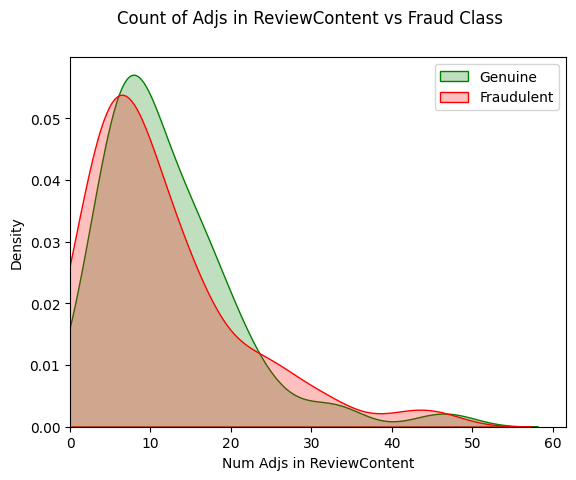

In [171]:
fraud_rows = balanced_sample_df[balanced_sample_df["flagged"]== 1]
gen_rows = balanced_sample_df[balanced_sample_df["flagged"]== 0]
fraud_adj = fraud_rows["adj_count"]
gen_adj = gen_rows["adj_count"]
density_plot(gen_adj, fraud_adj, "Num Adjs in ReviewContent", "Density","Count of Adjs in ReviewContent vs Fraud Class")
# density_plot(gen_noun, fraud_noun, "NounCount for Review Content," "Density", "Noun Count VS Fraud Class")


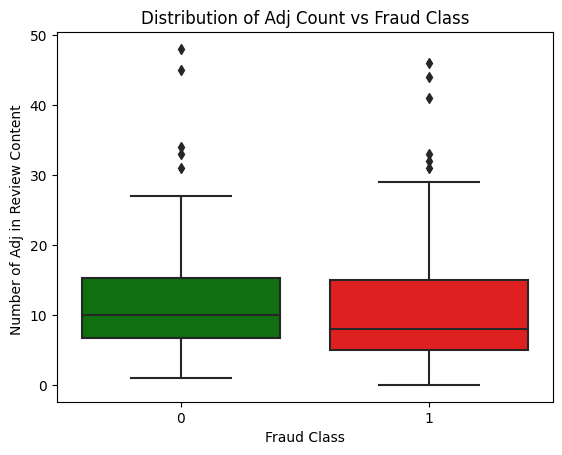

In [172]:
fig, ax = plt.subplots()

# Plot the boxplot on the axis object
sns.boxplot(x="flagged", y="adj_count", data=balanced_sample_df, palette={1: "red", 0: "green"}, ax=ax)

# Set the title and axis labels
ax.set_title("Distribution of Adj Count vs Fraud Class")
ax.set_ylabel("Number of Adj in Review Content ")
ax.set_xlabel("Fraud Class")

# Display the plot
plt.show()

### Correlation Matrix between the Noun, Verb and Adj Counts 

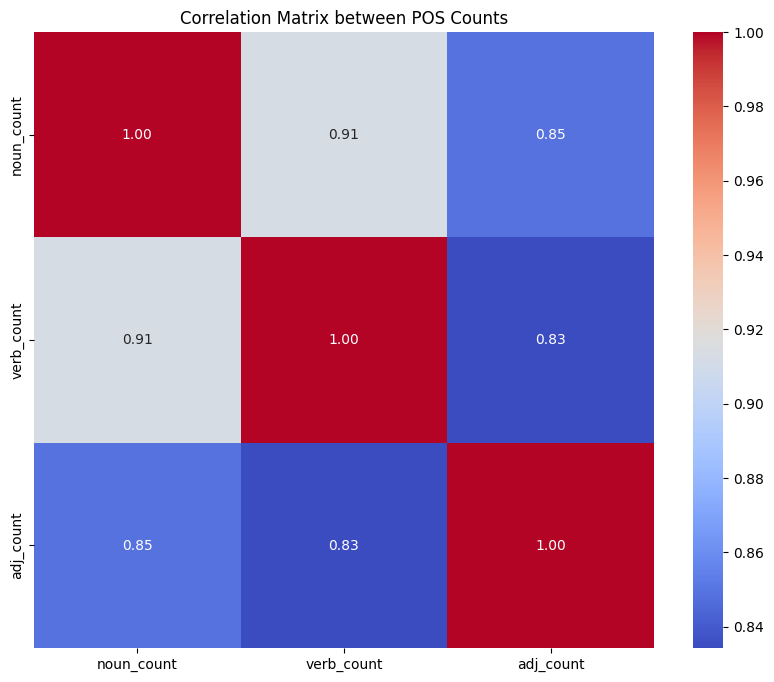

In [173]:
counts = balanced_sample_df[["noun_count", "verb_count", "adj_count", "flagged"]]

pos_matrix = counts.drop(columns=["flagged"]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(pos_matrix, annot=True, fmt=".2f", cmap='coolwarm', )
plt.title("Correlation Matrix between POS Counts")
plt.show()

In [174]:
balanced_sample_df.columns

Index(['reviewDate', 'reviewID', 'reviewerID', 'reviewContent', 'reviewRating',
       'reviewUsefulCount', 'reviewCoolCount', 'reviewFunnyCount',
       'restaurantID', 'flagged', 'reviewerName', 'reviewerLocation',
       'reviewerYelpJoinDate', 'reviewerFriendCount', 'reviewerNumReviews',
       'reviewerFirstCount', 'reviewerUsefulCount', 'reviewerCoolCount',
       'reviewerFunnyCount', 'reviewerComplimentCount', 'reviewerTipCount',
       'reviewerFanCount', 'resLocation', 'resName', 'resReviewCount',
       'resRating', 'DATE_TIME', 'EMAIL_ADDRESS', 'NRP', 'LOCATION', 'PERSON',
       'PHONE_NUMBER', 'DATE_TIME_count', 'EMAIL_ADDRESS_count', 'NRP_count',
       'LOCATION_count', 'PERSON_count', 'PHONE_NUMBER_count',
       'DATE_TIME_flag', 'EMAIL_ADDRESS_flag', 'NRP_flag', 'LOCATION_flag',
       'PERSON_flag', 'PHONE_NUMBER_flag', 'reviewDate2',
       'date_diff_joinedandreviewed', 'word_count', 'char_count', 'tokens',
       'clean_tokens', 'clean_text', 'ngrams', 'preproces

In [175]:
feature_dataset = balanced_sample_df.drop(columns=["reviewDate", "reviewID", "reviewerID", "reviewContent", "restaurantID", "reviewerName", "resName", "reviewerLocation", "resLocation"\
    , "reviewerYelpJoinDate", 'NRP', 'LOCATION', 'PERSON',
       'PHONE_NUMBER', 'DATE_TIME_count', 'EMAIL_ADDRESS_count', 'NRP_count',
       'LOCATION_count', 'PERSON_count', 'PHONE_NUMBER_count',
       'DATE_TIME_flag', 'EMAIL_ADDRESS_flag', 'NRP_flag', 'LOCATION_flag',
       'PERSON_flag', 'PHONE_NUMBER_flag', 'reviewDate2',
        'DATE_TIME', 'EMAIL_ADDRESS','clean_tokens', 'clean_text', 'ngrams', 'preprocessed', 'tokens' ])
feature_dataset.columns


Index(['reviewRating', 'reviewUsefulCount', 'reviewCoolCount',
       'reviewFunnyCount', 'flagged', 'reviewerFriendCount',
       'reviewerNumReviews', 'reviewerFirstCount', 'reviewerUsefulCount',
       'reviewerCoolCount', 'reviewerFunnyCount', 'reviewerComplimentCount',
       'reviewerTipCount', 'reviewerFanCount', 'resReviewCount', 'resRating',
       'date_diff_joinedandreviewed', 'word_count', 'char_count', 'main_topic',
       'noun_count', 'verb_count', 'adj_count'],
      dtype='object')

#### Feature Importance on Balanced Dataset 

In [176]:
X = feature_dataset.drop('flagged', axis=1)
y = feature_dataset['flagged']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


In [177]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

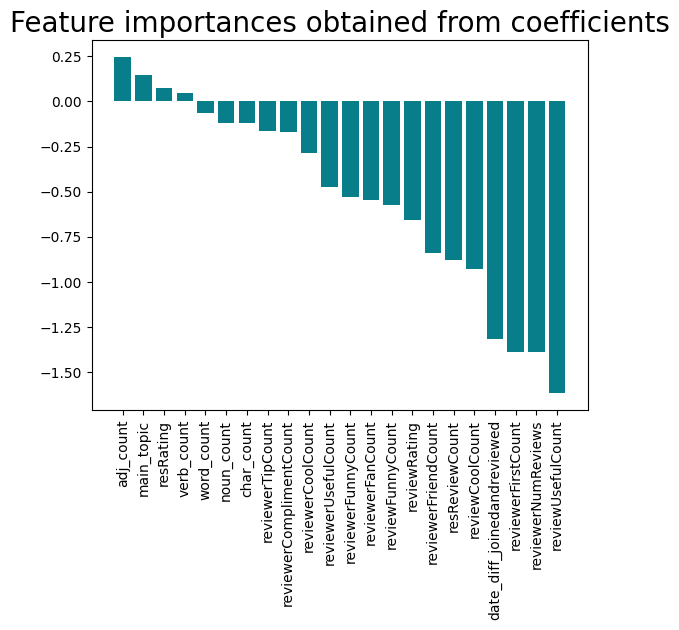

In [178]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### From the above analysis, together with the density / boxplots of how noun, adj and verb count segregates between the 2 classes, verb_count would be added to the dataframe 

In [179]:

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)


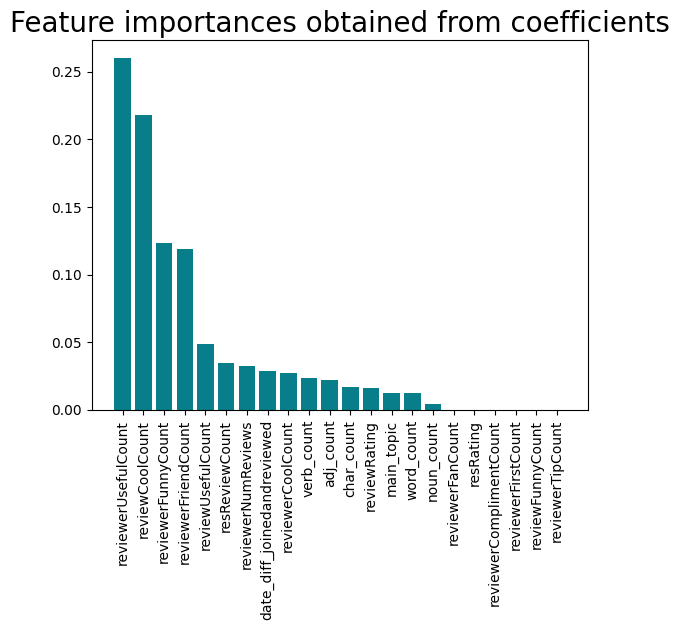

In [180]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### Take verb_count and adj_count based on factors on lower correlation and higher feature importance 

In [181]:
balanced_sample_df.columns

Index(['reviewDate', 'reviewID', 'reviewerID', 'reviewContent', 'reviewRating',
       'reviewUsefulCount', 'reviewCoolCount', 'reviewFunnyCount',
       'restaurantID', 'flagged', 'reviewerName', 'reviewerLocation',
       'reviewerYelpJoinDate', 'reviewerFriendCount', 'reviewerNumReviews',
       'reviewerFirstCount', 'reviewerUsefulCount', 'reviewerCoolCount',
       'reviewerFunnyCount', 'reviewerComplimentCount', 'reviewerTipCount',
       'reviewerFanCount', 'resLocation', 'resName', 'resReviewCount',
       'resRating', 'DATE_TIME', 'EMAIL_ADDRESS', 'NRP', 'LOCATION', 'PERSON',
       'PHONE_NUMBER', 'DATE_TIME_count', 'EMAIL_ADDRESS_count', 'NRP_count',
       'LOCATION_count', 'PERSON_count', 'PHONE_NUMBER_count',
       'DATE_TIME_flag', 'EMAIL_ADDRESS_flag', 'NRP_flag', 'LOCATION_flag',
       'PERSON_flag', 'PHONE_NUMBER_flag', 'reviewDate2',
       'date_diff_joinedandreviewed', 'word_count', 'char_count', 'tokens',
       'clean_tokens', 'clean_text', 'ngrams', 'preproces

#### Review Counts 

In [182]:
compare = pd.DataFrame({
    "Fake": df[df["flagged"]==1]["reviewUsefulCount"].describe(),
    "Genuine": df[df["flagged"]==0]["reviewUsefulCount"].describe()
})
compare

,Fake,Genuine
count,6204.0,20752.000000
mean,0.0,0.945692
std,0.0,2.063376
min,0.0,0.000000
25%,0.0,0.000000
50%,0.0,0.000000
75%,0.0,1.000000
max,0.0,49.000000
